# Analysis 
- from Analysis (Intact vs Rest)
## Mixed between-within subjects ANOVA 

Mixed-factorial design with ‘Outcome’ as the between-subjects factor that divides the sample into discrete subgroups (e.g., ‘good’ and ‘bad’), and ‘Task’ as the within-subjects factor that represents different conditions each subject undergoes (e.g., ‘IT’ and ‘RS’). The dependent variable ‘LZC’ is the measurement on each subject under each condition.

Missing values are automatically removed using a strict listwise approach (= complete-case analysis)
use linear mixed effect modeling to handle missing values in repeated measures.
For pairwise comparisons,
The the Pingouin library is used (This package provides post hoc tests for pairwise multiple comparisons that are usually performed)
#Having calculated the ANOVA, we can now run pairwise T-tests. 
To correct for multiple comparisons, the Benjamini/Hochberg FDR correction method is used to adjust pvalues.
- Can be `'listwise'` for listwise deletion of missing values in repeated measures design (= complete-case analysis) or `'pairwise'` for the more liberal pairwise deletion (= available-case analysis). The former (default) is more appropriate for post-hoc analysis following an ANOVA, however it can drastically reduce the power of the test: any subject with one or more missing value(s) will be completely removed from the analysis. 

#RMANOVA assumes sphericity (the variances of the differences between all combinations of related groups are 
    #equal). If this assumption is violated, adjustments to the degrees of freedom can be made 
        #(using Greenhouse-Geisser to adjust degrees of freedom).
        
 'Litrature Notes' in notion: (Visani et al., 2022)-explains thier stats analysis very well.

In [ ]:
ID = ['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31']

for i in range(1,32):
    print (f"'p{str(i).zfill(2)}',")
    print (f"'p{str(i).zfill(2)}',")

ID=['p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41','p42','p42','p43','p43','p44','p44','p45','p45','p46','p46','p47','p47','p48','p48','p49','p49']
for i in range(32,50): #p32-p49
    print (f"'p{str(i).zfill(2)}',",end="")
    print (f"'p{str(i).zfill(2)}',",end="")

In [223]:
#NEW DICTIONARIES
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}



## ____________________ _BELOW_ ____________________
#### - (1) IT v ST:  
        2(Task: ST, IT) x2(Outcome: HC, good, bad)
#### - (2) IT v RS:  
        2(Task: RS, IT) x2(Outcome: HC, good, bad)
#### - (3) Plot with Case Study  
## _________________________________________________

## (1) IT v ST 

IT v ST (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.888098                 0.053343   
        ST             23  0.885451                 0.054283   
good    IT             17  0.907322                 0.051967   
        ST             17  0.898105                 0.062395   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.011123 -0.931644  0.972985  
        ST                            0.011319 -0.842611  1.168950  
good    IT                            0.012604 -1.155599  1.147748  
        ST                            0.015133 -0.992047  0.242850

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0,1,38,0,0.84,.366,0.02,nan
1,Task,0,1,38,0,2.89,.097,0,1
2,Interaction,0,1,38,0,1.03,.316,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,1.7,39,two-sided,.097,nan,nan,0.636,0.1
1,Outcome,-,bad,good,0,1,-0.91,33.62,two-sided,.370,nan,nan,0.432,-0.29
2,Task * Outcome,IT,bad,good,0,1,-1.14,35.13,two-sided,.261,.508,fdr_bh,0.521,-0.36
3,Task * Outcome,ST,bad,good,0,1,-0.67,31.69,two-sided,.508,.508,fdr_bh,0.372,-0.21


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,-0.91,33.62,two-sided,.370,nan,nan,0.432,-0.29
1,Task,-,IT,ST,1,1,1.7,39,two-sided,.097,nan,nan,0.636,0.1
2,Outcome * Task,bad,IT,ST,1,1,0.83,22,two-sided,.418,.418,fdr_bh,0.297,0.05
3,Outcome * Task,good,IT,ST,1,1,1.5,16,two-sided,.154,.308,fdr_bh,0.637,0.16


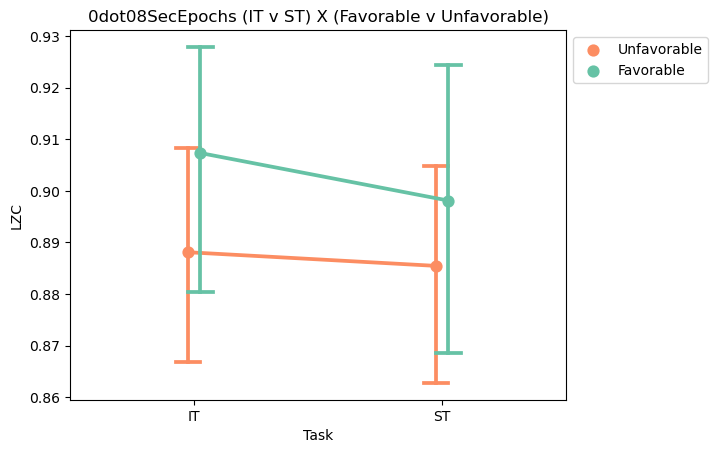

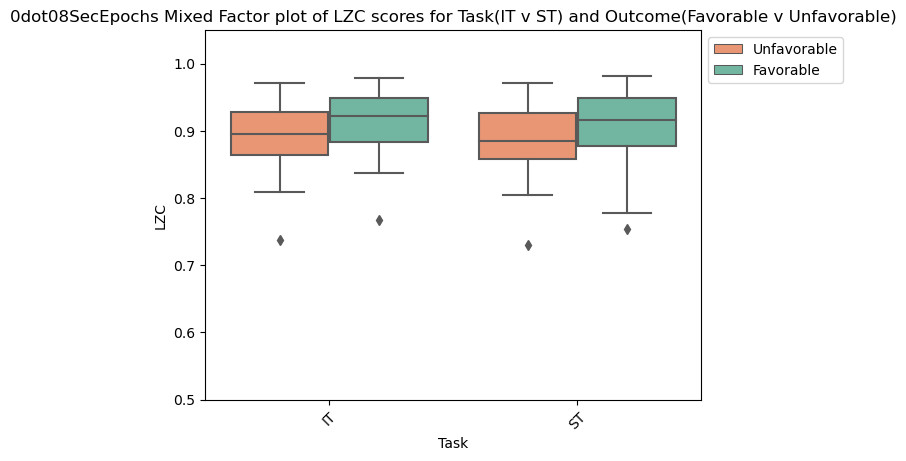






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.896796                 0.055380   
        ST             18  0.893670                 0.063211   
bad     IT             23  0.888098                 0.053343   
        ST             23  0.885451                 0.054283   
good    IT             17  0.907322                 0.051967   
        ST             17  0.898105                 0.062395   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.013053 -2.205187  4.883933  
        ST                            0.014899 -2.683814  7.656529  
bad     IT                            0.011123 -0.931644  0.972985  
        ST                            0.011319 -0.842611  1.168950  
good    IT                            0.012604 -1.155599  1.147748  
        ST                            0.015133 -0.992047  0.242850

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.01,2,55,0,0.41,.668,0.01,nan
1,Task,0,1,55,0,2.84,.097,0,1
2,Interaction,0,2,55,0,0.54,.587,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,1.7,57,two-sided,.094,nan,nan,0.554,0.08
1,Outcome,-,HC,bad,0,1,0.48,34.96,two-sided,.635,.701,fdr_bh,0.337,0.15
2,Outcome,-,HC,good,0,1,-0.39,32.99,two-sided,.701,.701,fdr_bh,0.345,-0.13
3,Outcome,-,bad,good,0,1,-0.91,33.62,two-sided,.370,.701,fdr_bh,0.432,-0.29
4,Task * Outcome,IT,HC,bad,0,1,0.51,35.99,two-sided,.615,.796,fdr_bh,0.341,0.16
5,Task * Outcome,IT,HC,good,0,1,-0.58,33,two-sided,.566,.796,fdr_bh,0.371,-0.19
6,Task * Outcome,IT,bad,good,0,1,-1.14,35.13,two-sided,.261,.796,fdr_bh,0.521,-0.36
7,Task * Outcome,ST,HC,bad,0,1,0.44,33.63,two-sided,.663,.796,fdr_bh,0.332,0.14
8,Task * Outcome,ST,HC,good,0,1,-0.21,32.93,two-sided,.836,.836,fdr_bh,0.331,-0.07
9,Task * Outcome,ST,bad,good,0,1,-0.67,31.69,two-sided,.508,.796,fdr_bh,0.372,-0.21


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,0.48,34.96,two-sided,.635,.701,fdr_bh,0.337,0.15
1,Outcome,-,HC,good,0,1,-0.39,32.99,two-sided,.701,.701,fdr_bh,0.345,-0.13
2,Outcome,-,bad,good,0,1,-0.91,33.62,two-sided,.370,.701,fdr_bh,0.432,-0.29
3,Task,-,IT,ST,1,1,1.7,57,two-sided,.094,nan,nan,0.554,0.08
4,Outcome * Task,HC,IT,ST,1,1,0.56,17,two-sided,.581,.581,fdr_bh,0.28,0.05
5,Outcome * Task,bad,IT,ST,1,1,0.83,22,two-sided,.418,.581,fdr_bh,0.297,0.05
6,Outcome * Task,good,IT,ST,1,1,1.5,16,two-sided,.154,.463,fdr_bh,0.637,0.16


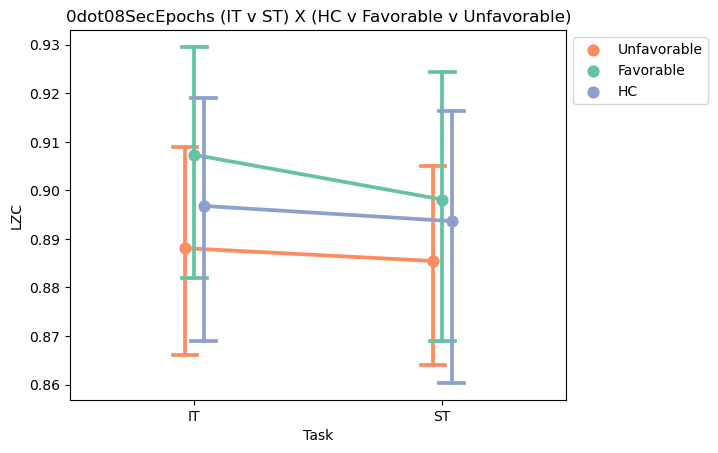

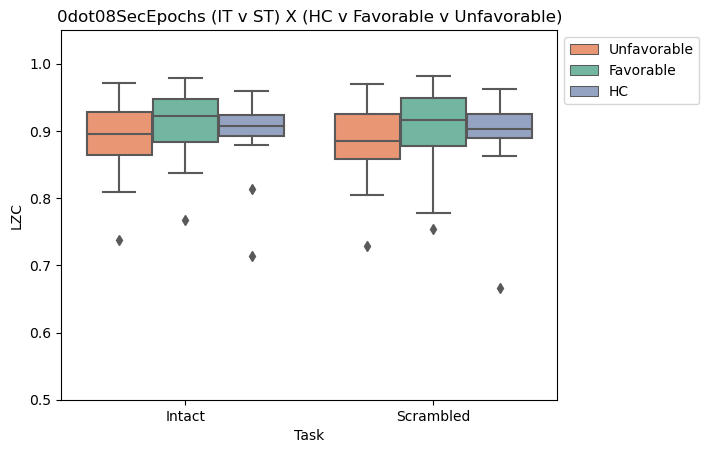

In [2]:
### OG: IT v ST ###
####### MOST UP TO DATE WITH NEW DATA #### MAY 8th 2024
####### MOST UP TO DATE #### MAY 2nd 2024
 
favorable_color = sns.color_palette("Set2")[0]
unfavorable_color = sns.color_palette("Set2")[1]
HC_colour = sns.color_palette("Set2")[2]

# Missing values are automatically removed using a strict listwise approach (= complete-case analysis)

#from workspace
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
# ssHC_ssPT
# PTgood, PTbad, & HC
# HC_ST='RS'
# 3am jan4th,2024
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################


#-----------------------------------------------------------------------------------------#
# loading LZC values
#'TenSecEpochs_delta' lots of sig
#'TenSecEpochs_gamma' Favorable on top
#'TenSecEpochs_alpha'
window = '0dot08SecEpochs'#'TenSecEpochs'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'
print(f'IT v ST ({window})')
vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
vars()[window].set_index('ID', inplace=True)
df = vars()[window].copy()
ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
ssHC = [f for f in df.index if 'HC' in f]
dfHC = df.copy().loc[ssHC]
df = df.copy().loc[ssfnames]
OGdf = df.copy() 
#display(df)

# load/read dict
import json
with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
# with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
    loaded_dict = json.load(file)
segsdf = pd.DataFrame(loaded_dict)
#display(segsdf)
#-----------------------------------------------------------------------------------------#
GCS = []
sedlist = []
sedlist2=[]
Uoutcomelist=[]
studylist=[]
Scan=[]
Tlist=[]
hplist = []
T2list=[]
ID2list=[]
IDlist=[]
for f in df.index:
    ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
    IDlist.append(ID)
    ID2 = f.split('_')[0]
    ID2list.append(ID2)
    #HC or PT 
    hp = 'hc' if 'HC' in f else 'pt'
    hplist.append(hp)
    #Task (RS/ST/IT)
    for Task in ['RS','ST','IT']:
        if Task in f:
            T = Task
            Tlist.append(T)
    T2=(f.split('_'))[1]
    T2list.append(T2)
    #part2/sedon/sedoff/-
    S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
    Scan.append(S)
    #studylist(NETICU/MIMIC/control)
    NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
    studylist.append(NMc)
    #outcomes 
    #for E in EVERYONE:
        #if E+'_' in f or E+'sed' in f or E+'part' in f:
            #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
            #Uoutcomelist.append(UO)
    U=Uoutcomedic[f]
    Uoutcomelist.append(U)
    #sed & GCS
    sedlist.append(seddic[f])
    SEDLIST =['OFF' if element == '-' else element for element in sedlist]
    GCS.append(GCSdic[f])
# Add Labels
df.insert(0,'sed',SEDLIST)
df.insert(0,'GCS',GCS)
df['GCS'] = pd.to_numeric(df['GCS'])
GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
df.insert(0,'GCS_8',GCS_8)
df.insert(0,'GCS_7',GCS_7)
df.insert(0,'GCS_6',GCS_6)
df.insert(0,'GCS_5',GCS_5)
df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
df.insert(0, 'participant_id', IDlist)
df.insert(0, 'ID2list', ID2list)
df.insert(0, 'Task2', T2list)
df.insert(0, 'Task', Tlist)
df.insert(0, 'Scan', Scan)
df.insert(0,'sed2',sedlist)
df.insert(0, 'study', studylist)
df.insert(0, 'HP', hplist)
#===========###==REMOVE MSICUpart2===###===========#
#                                                  #
df = df[~df.index.str.contains('MSICU05part2')]    #
print ('removed MSICU05part2',df.shape)            #
#                                                  #
#==================================================#

### MAIN MAIN <DATA-PREP> MAIN MAIN ###
#######################################
#----------------------------------------#
ssHC = df.copy()[df.copy().index.str.contains('HC')]
dfsedOFF = df[(df['sed']=='OFF')&(~df.index.str.contains('HC'))&(df['Task']!='RS')]
ssPT=dfsedOFF.copy()
ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
for i in range(1,(int((ssPT.shape[0])/2))+1):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    ID.append(a)
    ID.append(b)
ssPT.reset_index(inplace=True)
ssPT.drop('ID',axis=1,inplace=True)
ssPT.insert(0,'ID',ID)
ssPT = ssPT[['ID','Task', 'Uoutcome', 'LZC']]
ssPToutcome = list(ssPT['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
ssPT.drop('Uoutcome', axis=1, inplace=True)
ssPT.insert(1,'Outcome',ssPToutcome)
# # # #
HCID=[]# HCID=['p42','p42','p43','p43','p44','p44','p45','p45','p46','p46','p47','p47','p48','p48','p49','p49','p50','p50','p51','p51','p52','p52','p53','p53','p54','p54','p55','p55','p56','p56','p57','p57','p58','p58','p59','p59']
num = int((ID[(len(ID))-1])[1:]) # the last number from the patient list of ID's
for i in range(num+1, num+19):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    HCID.append(a)
    HCID.append(b)
ssHC.reset_index(inplace=True)
ssHC.drop('ID',axis=1,inplace=True)
ssHC.insert(0,'ID',HCID)
ssHC = ssHC[['ID','Task', 'Uoutcome', 'LZC']]
HCoutcome = list(ssHC['Uoutcome'].apply(lambda x: 'HC' if x == '1' else 'error'))
ssHC.drop('Uoutcome', axis=1, inplace=True)
ssHC.insert(1,'Outcome',HCoutcome)
# # # #
ssHC_ssPT = pd.concat([ssPT, ssHC])# CONCATINATE WITH ssHC
ssHC_ssPT.reset_index(drop=True, inplace=True)
#----------------------------------------#
#> long format
dfsedOFF = dfsedOFF[['Task', 'Uoutcome', 'LZC']]
outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
dfsedOFF.drop('Uoutcome', axis=1, inplace=True)
dfsedOFF.insert(0,'Outcome',outcome)
dfid=list(dfsedOFF.index)
ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
for i in range(1,(int((dfsedOFF.shape[0])/2))+1):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    ID.append(a)
    ID.append(b)
dfsedOFF.reset_index(inplace=True)
dfsedOFF.drop('ID',axis=1,inplace=True)
dfsedOFF.insert(0,'ID',ID) # p1&p2=same person, p4&p5=same person
#--------------------##Alternative
dfsedOFFalt = dfsedOFF.copy()#Alternative
groupvar=list(dfsedOFFalt['Outcome'] + '_' + dfsedOFFalt['Task'])
dfsedOFFalt.drop('Outcome', axis=1, inplace=True)
dfsedOFFalt.drop('Task', axis=1, inplace=True)
dfsedOFFalt.insert(1,'groupvar',groupvar)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
# meandf['group'] = meandf['Task'].astype(str) + '_' + meandf['Outcome'].astype(str)
#--------------------#


################################################################################################################    
##                                                   2x2                                                      ##
##                                                Statistics                                                  ## 
################################################################################################################ 
print('\n\n\n\n\n#############################################################\ndfsedOFF - Statistics\n#############################################################')
df=dfsedOFF.copy()
data =dfsedOFF.copy()
stackeddf =dfsedOFF.copy()
#******************************************************************#
# Table 1 - Descriptive statistics
#******************************************************************#
meandf = stackeddf.copy()
means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
meas=means.sort_values(ascending=False)
means2 = stackeddf.groupby('Task')['LZC'].mean()
algos=means2.sort_values(ascending=False)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
mix = meandf.groupby('group')['LZC'].mean()
mix2=mix.sort_values(ascending=False)
# print(meas)
# print(algos)
# print (mix2,'\n')
# desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
# display(desc_stats)
import scipy.stats as stats #wont workw/out imports
grouped = df.groupby(['Outcome', 'Task'])
stats_df = pd.DataFrame()
stats_df['Sample Size'] = grouped['LZC'].count()
stats_df['Mean (M)'] = grouped['LZC'].mean()
stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
display(stats_df)
#******************************************************************#
# Table 2 - Mixed-design (split-plot) Two-way ANOVA
#******************************************************************#
import pingouin as pg
aov = pg.mixed_anova(data, dv='LZC', 
              within='Task',
              between='Outcome',
              correction='auto',effsize='ng2',
              subject='ID')
#Posthoc1
stats = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh', #'fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g,`'cohen'``: Unbiased Cohen d
                          correction='auto',
                          within_first=True) #<--WE can flip and look at HC: IT vs ST('RS') in the post hoc analysis #
#Posthoc2
stats2 = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',
                          effsize='hedges', 
                          correction='auto',
                          within_first=False)
#Tables
aovdf = aov.copy()
posthocdf = stats.copy()
posthocdf2 = stats2.copy()
def format_cells(val, col_name):# Define the function to format cells
    if isinstance(val, (int, float)):
        if not np.isnan(val):
            if col_name in ['p-unc', 'p-corr']:
                return '{:.3f}'.format(val).lstrip('0')
            else:
                return '{:.2f}'.format(val).rstrip('0').rstrip('.')
    return val
aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
def highlight_pvalues(val):
    color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
    return 'color: %s' % color
aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
display(aovdf_styled)
display(posthocdf_styled)
display(posthocdf_styled2)
#2x2 ################################PointPlot
sns.pointplot(data, x='Task', y='LZC', hue='Outcome',
              hue_order=['bad','good'],
              order=['IT','ST'],
              dodge=True,
              capsize=.1,
              errorbar=('ci', 95),#errorbar='sd')
              palette = {'good':favorable_color, 'bad':unfavorable_color} #{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
             )
# plt.ylim(1, 7)
# plt.ylim(0, 1) 
# plt.ylim(0.65, 0.9) 
# _ = plt.title('LZC scores for IT/RS')
plt.title(f'{window} (IT v ST) X (Favorable v Unfavorable)')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
plt.show()
#2x2 ###################################BoxPlot
sns.boxplot(data=data, x="Task", y="LZC", hue="Outcome", 
               hue_order=['bad','good'],
               order=['IT','ST'],
               palette = {'good':favorable_color, 'bad':unfavorable_color} #{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
             )
plt.xlabel('Task')
plt.ylabel('LZC')
plt.ylim(0.5, 1.05)
plt.xticks(rotation=45) 
plt.title(f'{window} Mixed Factor plot of LZC scores for Task(IT v ST) and Outcome(Favorable v Unfavorable)')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1.3, 1), loc=0)
plt.show()


################################################################################################################    
##                                                3X2                                                         ##
##                                           Statistics w/ HC                                                 ## 
################################################################################################################ 
print('\n\n\n\n\n#############################################################\nssHC_ssP - Statistics\n#############################################################')
df=ssHC_ssPT.copy()
data = ssHC_ssPT.copy()
stackeddf = ssHC_ssPT.copy()
#******************************************************************#
# Table 1 - Descriptive statistics
#******************************************************************#
meandf = stackeddf.copy()
means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
meas=means.sort_values(ascending=False)
means2 = stackeddf.groupby('Task')['LZC'].mean()
algos=means2.sort_values(ascending=False)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
mix = meandf.groupby('group')['LZC'].mean()
mix2=mix.sort_values(ascending=False)
# print(meas)
# print(algos)
# print (mix2,'\n')
# desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
# display(desc_stats)
import scipy.stats as stats #wont workw/out imports
grouped = df.groupby(['Outcome', 'Task'])
stats_df = pd.DataFrame()
stats_df['Sample Size'] = grouped['LZC'].count()
stats_df['Mean (M)'] = grouped['LZC'].mean()
stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
display(stats_df)
#******************************************************************#
# Table 2 - Mixed-design (split-plot) Two-way ANOVA
#******************************************************************#
import pingouin as pg
aov = pg.mixed_anova(data, dv='LZC', 
              within='Task',
              between='Outcome',
              correction='auto',
              effsize='ng2',
              subject='ID')

#Posthoc
stats = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g
                          correction='auto',
                          within_first=True)
#Posthoc
stats2 = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g
                          correction='auto',
                          within_first=False)
#Tables
aovdf = aov.copy()
posthocdf = stats.copy()
posthocdf2 = stats2.copy()
def format_cells(val, col_name):# Define the function to format cells
    if isinstance(val, (int, float)):
        if not np.isnan(val):
            if col_name in ['p-unc', 'p-corr']:
                return '{:.3f}'.format(val).lstrip('0')
            else:
                return '{:.2f}'.format(val).rstrip('0').rstrip('.')
    return val
aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
def highlight_pvalues(val):
    color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
    return 'color: %s' % color
aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
display(aovdf_styled)
display(posthocdf_styled)
display(posthocdf_styled2)

#3x2#################### PointPlot
sns.pointplot(data, x='Task', y='LZC', hue='Outcome',
              hue_order=['bad','good','HC'],
              order=['IT','ST'],
              dodge=True,
              capsize=.1,
              errorbar=('ci', 95),#errorbar='sd')
              palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
             )
# plt.ylim(1, 7)
# plt.ylim(0, 1) 
# plt.ylim(0.65, 0.9) 
# _ = plt.title('LZC scores for IT/RS')
plt.title(f'{window} (IT v ST) X (HC v Favorable v Unfavorable)')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['HC' if l == 'HC'else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
# plt.show()
plt.show()

#3x2################## BoxPlot
sns.boxplot(x="Task", y="LZC", hue="Outcome", 
               hue_order=['bad','good','HC'],
               order=['IT','ST'],
               data=data, 
               #inner='box', #{"box", "quartile", "point", "stick", None}, optional Representation of the datapoints in the violin interior. If ``box``, draw a miniature boxplot. If ``quartiles``, draw the quartiles of the distribution.  If ``point`` or ``stick``, show each underlying datapoint. Using ``None`` will draw unadorned violins
               #dodge=True,
               palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #palette="Set2"#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
           )
plt.xlabel('Task')
plt.ylabel('LZC')
plt.ylim(0.5, 1.05)
plt.xticks(ticks=[0,1],labels=['Intact','Scrambled'])#rotation=45) 
plt.title(f'{window} (IT v ST) X (HC v Favorable v Unfavorable)')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['HC' if l == 'HC'else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
plt.show()
#---_-


## (2) IT v RS 

IT v RS (0dot08SecEpochs)
removed MSICU05part2 (272, 16)





#############################################################
dfsedOFF - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
bad     IT             23  0.888098                 0.053343   
        RS             23  0.877571                 0.051533   
good    IT             16  0.911700                 0.050330   
        RS             16  0.918084                 0.038512   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
bad     IT                            0.011123 -0.931644  0.972985  
        RS                            0.010745 -1.092969  2.635240  
good    IT                            0.012582 -1.444188  2.252151  
        RS                            0.009628 -0.823494  0.792061

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.02,1,37,0.02,4.59,.039,0.1,nan
1,Task,0,1,37,0,0.37,.545,0,1
2,Interaction,0,1,37,0,2.01,.165,0.01,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,RS,1,1,0.6,38,two-sided,.550,nan,nan,0.205,0.07
1,Outcome,-,bad,good,0,1,-2.22,35.94,two-sided,.033,nan,nan,2.072,-0.68
2,Task * Outcome,IT,bad,good,0,1,-1.41,33.61,two-sided,.169,.169,fdr_bh,0.682,-0.44
3,Task * Outcome,RS,bad,good,0,1,-2.81,36.76,two-sided,.008,.016,fdr_bh,5.961,-0.85


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,bad,good,0,1,-2.22,35.94,two-sided,.033,nan,nan,2.072,-0.68
1,Task,-,IT,RS,1,1,0.6,38,two-sided,.550,nan,nan,0.205,0.07
2,Outcome * Task,bad,IT,RS,1,1,1.44,22,two-sided,.164,.328,fdr_bh,0.542,0.2
3,Outcome * Task,good,IT,RS,1,1,-0.66,15,two-sided,.521,.521,fdr_bh,0.309,-0.14


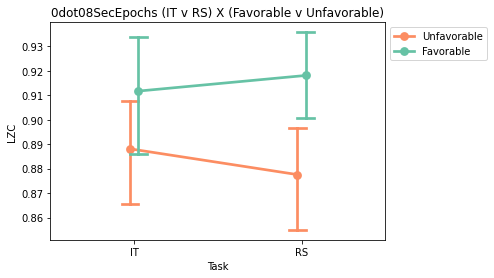

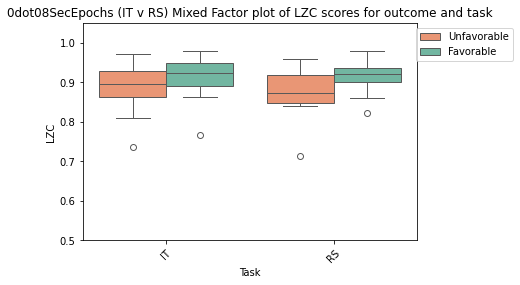






#############################################################
ssHC_ssP - Statistics
#############################################################


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.896796                 0.055380   
        RS             18  0.893670                 0.063211   
bad     IT             23  0.888098                 0.053343   
        RS             23  0.877571                 0.051533   
good    IT             16  0.911700                 0.050330   
        RS             16  0.918084                 0.038512   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.013053 -2.205187  4.883933  
        RS                            0.014899 -2.683814  7.656529  
bad     IT                            0.011123 -0.931644  0.972985  
        RS                            0.010745 -1.092969  2.635240  
good    IT                            0.012582 -1.444188  2.252151  
        RS                            0.009628 -0.823494  0.792061

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.02,2,54,0.01,1.93,.155,0.06,nan
1,Task,0,1,54,0,0.62,.436,0,1
2,Interaction,0,2,54,0,1.23,.300,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,RS,1,1,0.78,56,two-sided,.437,nan,nan,0.194,0.06
1,Outcome,-,HC,bad,0,1,0.72,33.37,two-sided,.475,.475,fdr_bh,0.379,0.23
2,Outcome,-,HC,good,0,1,-1.15,30.31,two-sided,.258,.386,fdr_bh,0.549,-0.38
3,Outcome,-,bad,good,0,1,-2.22,35.94,two-sided,.033,.098,fdr_bh,2.072,-0.68
4,Task * Outcome,IT,HC,bad,0,1,0.51,35.99,two-sided,.615,.615,fdr_bh,0.341,0.16
5,Task * Outcome,IT,HC,good,0,1,-0.82,31.98,two-sided,.417,.501,fdr_bh,0.427,-0.27
6,Task * Outcome,IT,bad,good,0,1,-1.41,33.61,two-sided,.169,.359,fdr_bh,0.682,-0.44
7,Task * Outcome,RS,HC,bad,0,1,0.88,32.49,two-sided,.387,.501,fdr_bh,0.417,0.28
8,Task * Outcome,RS,HC,good,0,1,-1.38,28.53,two-sided,.179,.359,fdr_bh,0.679,-0.45
9,Task * Outcome,RS,bad,good,0,1,-2.81,36.76,two-sided,.008,.048,fdr_bh,5.961,-0.85


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,0.72,33.37,two-sided,.475,.475,fdr_bh,0.379,0.23
1,Outcome,-,HC,good,0,1,-1.15,30.31,two-sided,.258,.386,fdr_bh,0.549,-0.38
2,Outcome,-,bad,good,0,1,-2.22,35.94,two-sided,.033,.098,fdr_bh,2.072,-0.68
3,Task,-,IT,RS,1,1,0.78,56,two-sided,.437,nan,nan,0.194,0.06
4,Outcome * Task,HC,IT,RS,1,1,0.56,17,two-sided,.581,.581,fdr_bh,0.28,0.05
5,Outcome * Task,bad,IT,RS,1,1,1.44,22,two-sided,.164,.491,fdr_bh,0.542,0.2
6,Outcome * Task,good,IT,RS,1,1,-0.66,15,two-sided,.521,.581,fdr_bh,0.309,-0.14


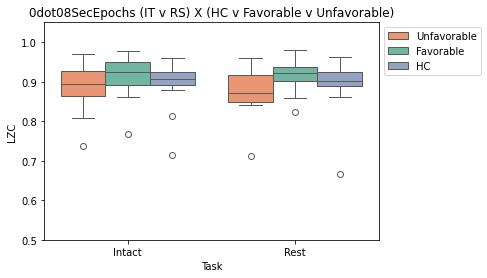

In [13]:
### OG: IT v RS ###
####### MOST UP TO DATE WITH NEW DATA #### MAY 8th 2024
####### MOST UP TO DATE #### MAY 2nd 2024

favorable_color = sns.color_palette("Set2")[0]
unfavorable_color = sns.color_palette("Set2")[1]
HC_colour = sns.color_palette("Set2")[2]


# Missing values are automatically removed using a strict listwise approach (= complete-case analysis)

#from workspace
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
# ssHC_ssPT
# PTgood, PTbad, & HC
# HC_ST='RS'
# 3am jan4th,2024
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################

#-----------------------------------------------------------------------------------------#
# loading LZC values
window = '0dot08SecEpochs'#'TenSecEpochs'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'
print(f'IT v RS ({window})')
vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
vars()[window].set_index('ID', inplace=True)
df = vars()[window].copy()
ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
ssHC = [f for f in df.index if 'HC' in f]
dfHC = df.copy().loc[ssHC]
df = df.copy().loc[ssfnames]
OGdf = df.copy()
#display(df)

# load/read dict
import json
with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
# with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
    loaded_dict = json.load(file)
segsdf = pd.DataFrame(loaded_dict)
#display(segsdf)
#-----------------------------------------------------------------------------------------#
GCS = []
sedlist = []
sedlist2=[]
Uoutcomelist=[]
studylist=[]
Scan=[]
Tlist=[]
hplist = []
T2list=[]
ID2list=[]
IDlist=[]
for f in df.index:
    ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
    IDlist.append(ID)
    ID2 = f.split('_')[0]
    ID2list.append(ID2)
    #HC or PT 
    hp = 'hc' if 'HC' in f else 'pt'
    hplist.append(hp)
    #Task (RS/ST/IT)
    for Task in ['RS','ST','IT']:
        if Task in f:
            T = Task
            Tlist.append(T)
    T2=(f.split('_'))[1]
    T2list.append(T2)
    #part2/sedon/sedoff/-
    S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
    Scan.append(S)
    #studylist(NETICU/MIMIC/control)
    NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
    studylist.append(NMc)
    #outcomes 
    #for E in EVERYONE:
        #if E+'_' in f or E+'sed' in f or E+'part' in f:
            #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
            #Uoutcomelist.append(UO)
    U=Uoutcomedic[f]
    Uoutcomelist.append(U)
    #sed & GCS
    sedlist.append(seddic[f])
    SEDLIST =['OFF' if element == '-' else element for element in sedlist]
    GCS.append(GCSdic[f])
# Add Labels
df.insert(0,'sed',SEDLIST)
df.insert(0,'GCS',GCS)
df['GCS'] = pd.to_numeric(df['GCS'])
GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
df.insert(0,'GCS_8',GCS_8)
df.insert(0,'GCS_7',GCS_7)
df.insert(0,'GCS_6',GCS_6)
df.insert(0,'GCS_5',GCS_5)
df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
df.insert(0, 'participant_id', IDlist)
df.insert(0, 'ID2list', ID2list)
df.insert(0, 'Task2', T2list)
df.insert(0, 'Task', Tlist)
df.insert(0, 'Scan', Scan)
df.insert(0,'sed2',sedlist)
df.insert(0, 'study', studylist)
df.insert(0, 'HP', hplist)
#===========###==REMOVE MSICUpart2===###===========#
#                                                  #
df = df[~df.index.str.contains('MSICU05part2')]    #
print ('removed MSICU05part2',df.shape)            #
#                                                  #
#==================================================#




### MAIN MAIN <DATA-PREP> MAIN MAIN ###
#######################################
#----------------------------------------#
ssHC = df.copy()[df.copy().index.str.contains('HC')]
dfsedOFF = df[(df['sed']=='OFF')&(~df.index.str.contains('HC'))&(df['Task']!='ST')]
for r in ['NETICU08sedoff_IT','NETICU18sedoff_RS','NETICU20sedoff_RS','NETICU25sedoff_RS','NETICU33sedoff_RS','NETICU46sedoff_RS']:
    dfsedOFF = dfsedOFF[~dfsedOFF.index.str.contains(r)]
ssPT=dfsedOFF.copy()
ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
for i in range(1,(int((ssPT.shape[0])/2))+1):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    ID.append(a)
    ID.append(b)
ssPT.reset_index(inplace=True)
ssPT.drop('ID',axis=1,inplace=True)
ssPT.insert(0,'ID',ID)
ssPT = ssPT[['ID','Task', 'Uoutcome', 'LZC']]
ssPToutcome = list(ssPT['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
ssPT.drop('Uoutcome', axis=1, inplace=True)
ssPT.insert(1,'Outcome',ssPToutcome)
# # # #
HCID=[]# HCID=['p42','p42','p43','p43','p44','p44','p45','p45','p46','p46','p47','p47','p48','p48','p49','p49','p50','p50','p51','p51','p52','p52','p53','p53','p54','p54','p55','p55','p56','p56','p57','p57','p58','p58','p59','p59']
num = int((ID[(len(ID))-1])[1:]) # the last number from the patient list of ID's
for i in range(num+1, num+19):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    HCID.append(a)
    HCID.append(b)
ssHC.reset_index(inplace=True)
ssHC.drop('ID',axis=1,inplace=True)
ssHC.insert(0,'ID',HCID)
ssHC = ssHC[['ID','Task', 'Uoutcome', 'LZC']]
HCoutcome = list(ssHC['Uoutcome'].apply(lambda x: 'HC' if x == '1' else 'error'))
ssHC.drop('Uoutcome', axis=1, inplace=True)
ssHC.insert(1,'Outcome',HCoutcome)
HCtask = list(ssHC['Task'].apply(lambda x: 'RS' if x == 'ST' else 'IT')) # ST --> RS #CHANGE ST TO RS
ssHC.drop('Task', axis=1, inplace=True)
ssHC.insert(2,'Task',HCtask)
# # # #
ssHC_ssPT = pd.concat([ssPT, ssHC])# CONCATINATE WITH ssHC
ssHC_ssPT.reset_index(drop=True, inplace=True)
#----------------------------------------#
#> long format
dfsedOFF = dfsedOFF[['Task', 'Uoutcome', 'LZC']]
outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
dfsedOFF.drop('Uoutcome', axis=1, inplace=True)
dfsedOFF.insert(0,'Outcome',outcome)
dfid=list(dfsedOFF.index)
ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
for i in range(1,(int((dfsedOFF.shape[0])/2))+1):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    ID.append(a)
    ID.append(b)
dfsedOFF.reset_index(inplace=True)
dfsedOFF.drop('ID',axis=1,inplace=True)
dfsedOFF.insert(0,'ID',ID) # p1&p2=same person, p4&p5=same person
# #--------------------##Alternative
# dfsedOFFalt = dfsedOFF.copy()#Alternative
# groupvar=list(dfsedOFFalt['Outcome'] + '_' + dfsedOFFalt['Task'])
# dfsedOFFalt.drop('Outcome', axis=1, inplace=True)
# dfsedOFFalt.drop('Task', axis=1, inplace=True)
# dfsedOFFalt.insert(1,'groupvar',groupvar)
# # meandf.columns = [col[0]+col[1] for col in meandf.columns]
# # meandf['group'] = meandf['Task'].astype(str) + '_' + meandf['Outcome'].astype(str)
# #--------------------#

################################################################################################################    
##                                                                                                            ##
##                                                Statistics                                                  ## 
################################################################################################################ 
print('\n\n\n\n\n#############################################################\ndfsedOFF - Statistics\n#############################################################')
df=dfsedOFF.copy()
data =dfsedOFF.copy()
stackeddf =dfsedOFF.copy()
#******************************************************************#
# Table 1 - Descriptive statistics
#******************************************************************#
meandf = stackeddf.copy()
means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
meas=means.sort_values(ascending=False)
means2 = stackeddf.groupby('Task')['LZC'].mean()
algos=means2.sort_values(ascending=False)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
mix = meandf.groupby('group')['LZC'].mean()
mix2=mix.sort_values(ascending=False)
# print(meas)
# print(algos)
# print (mix2,'\n')
# desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
# display(desc_stats)
import scipy.stats as stats #wont workw/out imports
grouped = df.groupby(['Outcome', 'Task'])
stats_df = pd.DataFrame()
stats_df['Sample Size'] = grouped['LZC'].count()
stats_df['Mean (M)'] = grouped['LZC'].mean()
stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
display(stats_df)
#******************************************************************#
# Table 2 - Mixed-design (split-plot) Two-way ANOVA
#******************************************************************#
import pingouin as pg
aov = pg.mixed_anova(data, dv='LZC', 
              within='Task',
              between='Outcome',
              correction='auto',effsize='ng2',
              subject='ID')
#Posthoc
stats = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g,`'cohen'``: Unbiased Cohen d
                          correction='auto',
                          within_first=True) #<--WE can flip and look at HC: IT vs ST('RS') in the post hoc analysis #
#Posthoc2
stats2 = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',
                          effsize='hedges', 
                          correction='auto',
                          within_first=False)
#Tables
aovdf = aov.copy()
posthocdf = stats.copy()
posthocdf2 = stats2.copy()
def format_cells(val, col_name):# Define the function to format cells
    if isinstance(val, (int, float)):
        if not np.isnan(val):
            if col_name in ['p-unc', 'p-corr']:
                return '{:.3f}'.format(val).lstrip('0')
            else:
                return '{:.2f}'.format(val).rstrip('0').rstrip('.')
    return val
aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
def highlight_pvalues(val):
    color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
    return 'color: %s' % color
aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
display(aovdf_styled)
display(posthocdf_styled)
display(posthocdf_styled2)

#2x2 ################################PointPlot
sns.pointplot(data, x='Task', y='LZC', hue='Outcome',
              hue_order=['bad','good'], order=['IT','RS'],
              dodge=True,
              capsize=.1,
              errorbar=('ci', 95),#errorbar='sd')
              palette = {'good':favorable_color, 'bad':unfavorable_color}#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
             )
# plt.ylim(1, 7)
# plt.ylim(0, 1) 
# plt.ylim(0.65, 0.9) 
# _ = plt.title('LZC scores for IT/RS')
plt.title(f'{window} (IT v RS) X (Favorable v Unfavorable)')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
plt.show()
#2x2 ###################################BoxPlot
sns.boxplot(data=data, x="Task", y="LZC", hue="Outcome", 
               hue_order=['bad','good'], order=['IT','RS'],
               #inner='box', #{"box", "quartile", "point", "stick", None}, optional Representation of the datapoints in the violin interior. If ``box``, draw a miniature boxplot. If ``quartiles``, draw the quartiles of the distribution.  If ``point`` or ``stick``, show each underlying datapoint. Using ``None`` will draw unadorned violins
               #dodge=True,
               palette = {'good':favorable_color, 'bad':unfavorable_color})
plt.xlabel('Task')
plt.ylabel('LZC')
plt.ylim(0.5, 1.05)
plt.xticks(rotation=45) 
plt.title(f'{window} (IT v RS) Mixed Factor plot of LZC scores for outcome and task')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1.3, 1), loc=0)
plt.show()

################################################################################################################    
##                                                3X3                                                         ##
##                                           Statistics w/ HC                                                 ## 
################################################################################################################ 
print('\n\n\n\n\n#############################################################\nssHC_ssP - Statistics\n#############################################################')
df=ssHC_ssPT.copy()
data = ssHC_ssPT.copy()
stackeddf = ssHC_ssPT.copy()
#******************************************************************#
# Table 1 - Descriptive statistics
#******************************************************************#
meandf = stackeddf.copy()
means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
meas=means.sort_values(ascending=False)
means2 = stackeddf.groupby('Task')['LZC'].mean()
algos=means2.sort_values(ascending=False)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
mix = meandf.groupby('group')['LZC'].mean()
mix2=mix.sort_values(ascending=False)
# print(meas)
# print(algos)
# print (mix2,'\n')
# desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
# display(desc_stats)
import scipy.stats as stats #wont workw/out imports
grouped = df.groupby(['Outcome', 'Task'])
stats_df = pd.DataFrame()
stats_df['Sample Size'] = grouped['LZC'].count()
stats_df['Mean (M)'] = grouped['LZC'].mean()
stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
display(stats_df)
#******************************************************************#
# Table 2 - Mixed-design (split-plot) Two-way ANOVA
#******************************************************************#
import pingouin as pg
aov = pg.mixed_anova(data, dv='LZC', 
              within='Task',
              between='Outcome',
              correction='auto',
              effsize='ng2',
              subject='ID')
#Posthoc
stats = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g
                          correction='auto',
                          within_first=True)
#Posthoc
stats2 = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g
                          correction='auto',
                          within_first=False)
#Tables
aovdf = aov.copy()
posthocdf = stats.copy()
posthocdf2 = stats2.copy()
def format_cells(val, col_name):# Define the function to format cells
    if isinstance(val, (int, float)):
        if not np.isnan(val):
            if col_name in ['p-unc', 'p-corr']:
                return '{:.3f}'.format(val).lstrip('0')
            else:
                return '{:.2f}'.format(val).rstrip('0').rstrip('.')
    return val
aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
def highlight_pvalues(val):
    color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
    return 'color: %s' % color
aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
display(aovdf_styled)
display(posthocdf_styled)
display(posthocdf_styled2)

#3x2#################### PointPlot
# sns.pointplot(data, x='Task', y='LZC', hue='Outcome', 
#               hue_order=['bad','good','HC'], order=['IT','RS'],
#               dodge=True,
#               capsize=.1,
#               errorbar=('ci', 95),#errorbar='sd')
#               palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour}#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
#              )
# # plt.ylim(1, 7)
# # plt.ylim(0, 1) 
# # plt.ylim(0.65, 0.9) 
# # _ = plt.title('LZC scores for IT/RS')
# plt.title(f'{window}(IT v RS) X (HC v Favorable v Unfavorable)')
# handles, labels = plt.gca().get_legend_handles_labels()
# new_labels = ['HC' if l == 'HC'else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
# plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
# # plt.show()
# plt.show()

#3x2################## BoxPlot
sns.boxplot(data, x="Task", y="LZC", hue="Outcome", 
               hue_order=['bad','good','HC'], order=['IT','RS'],
               #inner='box', #{"box", "quartile", "point", "stick", None}, optional Representation of the datapoints in the violin interior. If ``box``, draw a miniature boxplot. If ``quartiles``, draw the quartiles of the distribution.  If ``point`` or ``stick``, show each underlying datapoint. Using ``None`` will draw unadorned violins
               #dodge=True,
               palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #palette="Set2"#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
           )
plt.xlabel('Task')
plt.ylabel('LZC')
plt.ylim(0.5, 1.05)
plt.xticks(ticks=[0,1],labels=['Intact','Rest'])#rotation=45) 
plt.title(f'{window} (IT v RS) X (HC v Favorable v Unfavorable)')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['HC' if l == 'HC'else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
plt.show()
#---_-



# TenSecEpochs

# (3) Plot with Case Study






#############################################################
TenSecEpochs
#############################################################
*******---> TenSecEpochs <---*******


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.768587                 0.079541   
        ST             18  0.784679                 0.075313   
bad     IT             23  0.859253                 0.067036   
        ST             23  0.849619                 0.067999   
good    IT             18  0.787013                 0.120862   
        ST             18  0.801052                 0.092570   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.018748 -0.186663 -0.744227  
        ST                            0.017751 -0.386917 -0.596468  
bad     IT                            0.013978 -0.396151 -0.576069  
        ST                            0.014179 -0.470298 -0.359266  
good    IT                            0.028487 -2.209394  4.697449  
        ST                            0.021819 -1.392228  1.432807

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.14,2,56,0.07,5.2,.008,0.15,nan
1,Task,0,1,56,0,1.03,.314,0,1
2,Interaction,0,2,56,0,2.55,.088,0.01,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,-0.99,58,two-sided,.326,nan,nan,0.227,-0.06
1,Outcome,-,HC,bad,0,1,-3.52,35.16,two-sided,.001,.004,fdr_bh,28.416,-1.1
2,Outcome,-,HC,good,0,1,-0.58,34,two-sided,.567,.567,fdr_bh,0.367,-0.19
3,Outcome,-,bad,good,0,1,2.13,27.45,two-sided,.043,.064,fdr_bh,1.769,0.69
4,Task * Outcome,IT,HC,bad,0,1,-3.88,33.22,two-sided,.000,.003,fdr_bh,67.381,-1.22
5,Task * Outcome,IT,HC,good,0,1,-0.54,34,two-sided,.593,.593,fdr_bh,0.361,-0.18
6,Task * Outcome,IT,bad,good,0,1,2.28,25.05,two-sided,.032,.063,fdr_bh,2.262,0.75
7,Task * Outcome,ST,HC,bad,0,1,-2.86,34.7,two-sided,.007,.021,fdr_bh,6.678,-0.89
8,Task * Outcome,ST,HC,good,0,1,-0.58,34,two-sided,.564,.593,fdr_bh,0.367,-0.19
9,Task * Outcome,ST,bad,good,0,1,1.87,30.22,two-sided,.072,.108,fdr_bh,1.196,0.6


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,-3.52,35.16,two-sided,.001,.004,fdr_bh,28.416,-1.1
1,Outcome,-,HC,good,0,1,-0.58,34,two-sided,.567,.567,fdr_bh,0.367,-0.19
2,Outcome,-,bad,good,0,1,2.13,27.45,two-sided,.043,.064,fdr_bh,1.769,0.69
3,Task,-,IT,ST,1,1,-0.99,58,two-sided,.326,nan,nan,0.227,-0.06
4,Outcome * Task,HC,IT,ST,1,1,-1.27,17,two-sided,.222,.237,fdr_bh,0.485,-0.2
5,Outcome * Task,bad,IT,ST,1,1,3,22,two-sided,.007,.020,fdr_bh,6.935,0.14
6,Outcome * Task,good,IT,ST,1,1,-1.23,17,two-sided,.237,.237,fdr_bh,0.464,-0.13


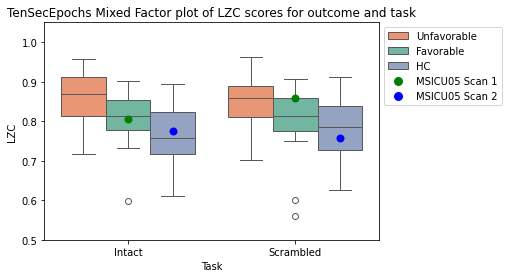

In [15]:
# #MSICU05 
### IT v ST ###
####### MOST UP TO DATE WITH NEW DATA #### MAY 8th 2024
####### MOST UP TO DATE #### MAY 2nd 2024

favorable_color = sns.color_palette("Set2")[0]
unfavorable_color = sns.color_palette("Set2")[1]
HC_colour = sns.color_palette("Set2")[2]
# Missing values are automatically removed using a strict listwise approach (= complete-case analysis)

#from workspace
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
# ssHC_ssPT
# PTgood, PTbad, & HC
# HC_ST='RS'
# 3am jan4th,2024
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################


#-----------------------------------------------------------------------------------------#
# loading LZC values
#'TenSecEpochs_delta' lots of sig
#'TenSecEpochs_gamma' Favorable on top
#'TenSecEpochs_alpha'
# window = 'TenSecEpochs_delta'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'

# for window in ['TenSecEpochs','TenSecEpochs_delta','TenSecEpochs_theta','TenSecEpochs_alpha','TenSecEpochs_beta','TenSecEpochs_gamma']:
# for window in ['0dot2SecEpochs','0dot2SecEpochs_delta','0dot2SecEpochs_theta','0dot2SecEpochs_alpha','0dot2SecEpochs_beta','0dot2SecEpochs_gamma']:
# window = 'TenSecEpochs'
window= 'TenSecEpochs'
print(f'\n\n\n\n\n#############################################################\n{window}\n#############################################################')
print (f'*******---> {window} <---*******')
vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
vars()[window].set_index('ID', inplace=True)
df = vars()[window].copy()
ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
ssHC = [f for f in df.index if 'HC' in f]
dfHC = df.copy().loc[ssHC]
df = df.copy().loc[ssfnames]
OGdf = df.copy()
#display(df)

# load/read dict
import json
with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
# with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
    loaded_dict = json.load(file)
segsdf = pd.DataFrame(loaded_dict)
#display(segsdf)
#-----------------------------------------------------------------------------------------#
GCS = []
sedlist = []
sedlist2=[]
Uoutcomelist=[]
studylist=[]
Scan=[]
Tlist=[]
hplist = []
T2list=[]
ID2list=[]
IDlist=[]
for f in df.index:
    ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
    IDlist.append(ID)
    ID2 = f.split('_')[0]
    ID2list.append(ID2)
    #HC or PT 
    hp = 'hc' if 'HC' in f else 'pt'
    hplist.append(hp)
    #Task (RS/ST/IT)
    for Task in ['RS','ST','IT']:
        if Task in f:
            T = Task
            Tlist.append(T)
    T2=(f.split('_'))[1]
    T2list.append(T2)
    #part2/sedon/sedoff/-
    S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
    Scan.append(S)
    #studylist(NETICU/MIMIC/control)
    NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
    studylist.append(NMc)
    #outcomes 
    #for E in EVERYONE:
        #if E+'_' in f or E+'sed' in f or E+'part' in f:
            #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
            #Uoutcomelist.append(UO)
    U=Uoutcomedic[f]
    Uoutcomelist.append(U)
    #sed & GCS
    sedlist.append(seddic[f])
    SEDLIST =['OFF' if element == '-' else element for element in sedlist]
    GCS.append(GCSdic[f])
# Add Labels
df.insert(0,'sed',SEDLIST)
df.insert(0,'GCS',GCS)
df['GCS'] = pd.to_numeric(df['GCS'])
GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
df.insert(0,'GCS_8',GCS_8)
df.insert(0,'GCS_7',GCS_7)
df.insert(0,'GCS_6',GCS_6)
df.insert(0,'GCS_5',GCS_5)
df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
df.insert(0, 'participant_id', IDlist)
df.insert(0, 'ID2list', ID2list)
df.insert(0, 'Task2', T2list)
df.insert(0, 'Task', Tlist)
df.insert(0, 'Scan', Scan)
df.insert(0,'sed2',sedlist)
df.insert(0, 'study', studylist)
df.insert(0, 'HP', hplist)


### MAIN MAIN <DATA-PREP> MAIN MAIN ###
#######################################
#----------------------------------------#
ssHC = df.copy()[df.copy().index.str.contains('HC')]
dfsedOFF = df[(df['sed']=='OFF')&(~df.index.str.contains('HC'))&(df['Task']!='RS')]
ssPT=dfsedOFF.copy()
ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
for i in range(1,(int((ssPT.shape[0])/2))+1):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    ID.append(a)
    ID.append(b)
ssPT.reset_index(inplace=True)
ssPT.drop('ID',axis=1,inplace=True)
ssPT.insert(0,'ID',ID)
ssPT = ssPT[['ID','Task', 'Uoutcome', 'LZC']]
ssPToutcome = list(ssPT['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
ssPT.drop('Uoutcome', axis=1, inplace=True)
ssPT.insert(1,'Outcome',ssPToutcome)
# # # #
HCID=[]# HCID=['p42','p42','p43','p43','p44','p44','p45','p45','p46','p46','p47','p47','p48','p48','p49','p49','p50','p50','p51','p51','p52','p52','p53','p53','p54','p54','p55','p55','p56','p56','p57','p57','p58','p58','p59','p59']
num = int((ID[(len(ID))-1])[1:]) # the last number from the patient list of ID's
for i in range(num+1, num+19):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    HCID.append(a)
    HCID.append(b)
ssHC.reset_index(inplace=True)
ssHC.drop('ID',axis=1,inplace=True)
ssHC.insert(0,'ID',HCID)
ssHC = ssHC[['ID','Task', 'Uoutcome', 'LZC']]
HCoutcome = list(ssHC['Uoutcome'].apply(lambda x: 'HC' if x == '1' else 'error'))
ssHC.drop('Uoutcome', axis=1, inplace=True)
ssHC.insert(1,'Outcome',HCoutcome)
# # # #
ssHC_ssPT = pd.concat([ssPT, ssHC])# CONCATINATE WITH ssHC
ssHC_ssPT.reset_index(drop=True, inplace=True)
#----------------------------------------#
#> long format
dfsedOFF = dfsedOFF[['Task', 'Uoutcome', 'LZC']]
outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
dfsedOFF.drop('Uoutcome', axis=1, inplace=True)
dfsedOFF.insert(0,'Outcome',outcome)
dfid=list(dfsedOFF.index)
ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
for i in range(1,(int((dfsedOFF.shape[0])/2))+1):
    a='p'+str(i).zfill(2)
    b='p'+str(i).zfill(2)
    ID.append(a)
    ID.append(b)
dfsedOFF.reset_index(inplace=True)
dfsedOFF.drop('ID',axis=1,inplace=True)
dfsedOFF.insert(0,'ID',ID) # p1&p2=same person, p4&p5=same person
#--------------------##Alternative
dfsedOFFalt = dfsedOFF.copy()#Alternative
groupvar=list(dfsedOFFalt['Outcome'] + '_' + dfsedOFFalt['Task'])
dfsedOFFalt.drop('Outcome', axis=1, inplace=True)
dfsedOFFalt.drop('Task', axis=1, inplace=True)
dfsedOFFalt.insert(1,'groupvar',groupvar)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
# meandf['group'] = meandf['Task'].astype(str) + '_' + meandf['Outcome'].astype(str)
#--------------------#


################################################################################################################    
##                                                                                                            ##
##                                                Statistics                                                  ## 
################################################################################################################ 
#print('\n\n\n\n\n#############################################################\ndfsedOFF - Statistics\n#############################################################')




################################################################################################################    
##                                                3X2                                                         ##
##                                           Statistics  2   w/ HC                                            ## 
################################################################################################################ 
#print('\n\n\n\n\n#############################################################\nssHC_ssP - Statistics\n#############################################################')
df=ssHC_ssPT.copy()
data = ssHC_ssPT.copy()
stackeddf = ssHC_ssPT.copy()
#******************************************************************#
# Table 1 - Descriptive statistics
#******************************************************************#
meandf = stackeddf.copy()
means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
meas=means.sort_values(ascending=False)
means2 = stackeddf.groupby('Task')['LZC'].mean()
algos=means2.sort_values(ascending=False)
# meandf.columns = [col[0]+col[1] for col in meandf.columns]
meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
mix = meandf.groupby('group')['LZC'].mean()
mix2=mix.sort_values(ascending=False)
# print(meas)
# print(algos)
# print (mix2,'\n')
# desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
# display(desc_stats)
import scipy.stats as stats #wont workw/out imports
grouped = df.groupby(['Outcome', 'Task'])
stats_df = pd.DataFrame()
stats_df['Sample Size'] = grouped['LZC'].count()
stats_df['Mean (M)'] = grouped['LZC'].mean()
stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
display(stats_df)
#******************************************************************#
# Table 2 - Mixed-design (split-plot) Two-way ANOVA
#******************************************************************#
import pingouin as pg
aov = pg.mixed_anova(data, dv='LZC', 
              within='Task',
              between='Outcome',
              correction='auto',
              effsize='ng2',
              subject='ID')

#Posthoc
stats = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g
                          correction='auto',
                          within_first=True)
#Posthoc
stats2 = pg.pairwise_tests(data, dv='LZC',
                          between='Outcome', 
                          within='Task',
                          subject='ID',
                          padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                          effsize='hedges', # Hedges g
                          correction='auto',
                          within_first=False)
#Tables
aovdf = aov.copy()
posthocdf = stats.copy()
posthocdf2 = stats2.copy()

def format_cells(val, col_name):# Define the function to format cells
    if isinstance(val, (int, float)):
        if not np.isnan(val):
            if col_name in ['p-unc', 'p-corr']:
                return '{:.3f}'.format(val).lstrip('0')
            else:
                return '{:.2f}'.format(val).rstrip('0').rstrip('.')
    return val
aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))

def highlight_pvalues(val):
    color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
    return 'color: %s' % color
aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])

display(aovdf_styled)
display(posthocdf_styled)
display(posthocdf_styled2)



#3x2################## BoxPlot
sns.boxplot(x="Task", y="LZC", 
               hue="Outcome", 
               hue_order=['bad','good','HC'],
               order=['IT','ST'],
               data=data, 
               #inner='box', #{"box", "quartile", "point", "stick", None}, optional Representation of the datapoints in the violin interior. If ``box``, draw a miniature boxplot. If ``quartiles``, draw the quartiles of the distribution.  If ``point`` or ``stick``, show each underlying datapoint. Using ``None`` will draw unadorned violins
               #dodge=True,
               palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #palette="Set2"#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
           )
# MSICU_05
data.loc[data['ID'] == 'p04', 'Outcome'] = 'HC'#changing msicu05part2 into ‘HC’ in their Outcome column (so that they apear in HC section)
subset_data = data[data['ID'].isin(['p01','p03', 'p04'])]
my_pal = {"HC":"blue", "bad":"none", "good":"green"}
sns.stripplot(x="Task", y="LZC", 
              hue="Outcome", 
              data=subset_data, 
              hue_order=['bad','good','HC'],
              order=['IT','ST'],
              size=8, 
              palette = my_pal,
              jitter=False, dodge=True)
# Customize plot
plt.xlabel('Task')
plt.ylabel('LZC')
plt.ylim(0.5, 1.05)
plt.xticks(ticks=[0,1],labels=['Intact','Scrambled'])#rotation=45) 
plt.title(f'{window} Mixed Factor plot of LZC scores for outcome and task')
# Update legend labels
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['HC' if l == 'HC' else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
#Remove duplicate labels
handles = [handles[idx] for idx, label in enumerate(labels) if label not in labels[:idx]]
new_labels = [label for idx, label in enumerate(new_labels) if label not in new_labels[:idx]]
# Add the custom label for MSICU05
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='MSICU05_scan1'))
new_labels.append('MSICU05 Scan 1')
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='MSICU05_scan2'))
new_labels.append('MSICU05 Scan 2')
plt.legend(handles, new_labels, bbox_to_anchor=(1, 1), loc='best')
# plt.savefig("MSICU05.png", dpi=300)
plt.show()






#############################################################
0dot02SecEpochs
#############################################################
*******---> 0dot02SecEpochs <---*******
removed MSICU05part2 (272, 16)


Sample Size  Mean (M)  Standard Deviation (SD)  \
Outcome Task                                                   
HC      IT             18  0.941137                 0.045119   
        ST             18  0.938113                 0.052241   
bad     IT             23  0.888916                 0.065963   
        ST             23  0.883797                 0.067410   
good    IT             17  0.909704                 0.066779   
        ST             17  0.897523                 0.083993   

              Standard Error of the Mean (SEM)  Skewness  Kurtosis  
Outcome Task                                                        
HC      IT                            0.010635 -2.206366  4.286221  
        ST                            0.012313 -2.923511  8.297408  
bad     IT                            0.013754 -0.882463 -0.098844  
        ST                            0.014056 -0.650698 -0.621405  
good    IT                            0.016196 -0.885594 -0.078712  
        ST                            0.020371 -1.146450  1.085293

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,Outcome,0.06,2,55,0.03,3.58,.034,0.11,nan
1,Task,0,1,55,0,4.73,.034,0,1
2,Interaction,0,2,55,0,0.77,.467,0,nan


,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,IT,ST,1,1,2.18,57,two-sided,.033,nan,nan,1.286,0.1
1,Outcome,-,HC,bad,0,1,3.01,38.8,two-sided,.005,.014,fdr_bh,9.06,0.89
2,Outcome,-,HC,good,0,1,1.69,26.87,two-sided,.103,.154,fdr_bh,0.965,0.56
3,Outcome,-,bad,good,0,1,-0.76,31.94,two-sided,.454,.454,fdr_bh,0.391,-0.24
4,Task * Outcome,IT,HC,bad,0,1,3,38.4,two-sided,.005,.018,fdr_bh,9.012,0.89
5,Task * Outcome,IT,HC,good,0,1,1.62,27.89,two-sided,.116,.174,fdr_bh,0.889,0.54
6,Task * Outcome,IT,bad,good,0,1,-0.98,34.39,two-sided,.335,.402,fdr_bh,0.455,-0.31
7,Task * Outcome,ST,HC,bad,0,1,2.91,39,two-sided,.006,.018,fdr_bh,7.368,0.87
8,Task * Outcome,ST,HC,good,0,1,1.71,26.5,two-sided,.100,.174,fdr_bh,0.985,0.57
9,Task * Outcome,ST,bad,good,0,1,-0.55,29.93,two-sided,.583,.583,fdr_bh,0.352,-0.18


,Contrast,Outcome,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Outcome,-,HC,bad,0,1,3.01,38.8,two-sided,.005,.014,fdr_bh,9.06,0.89
1,Outcome,-,HC,good,0,1,1.69,26.87,two-sided,.103,.154,fdr_bh,0.965,0.56
2,Outcome,-,bad,good,0,1,-0.76,31.94,two-sided,.454,.454,fdr_bh,0.391,-0.24
3,Task,-,IT,ST,1,1,2.18,57,two-sided,.033,nan,nan,1.286,0.1
4,Outcome * Task,HC,IT,ST,1,1,0.59,17,two-sided,.564,.564,fdr_bh,0.284,0.06
5,Outcome * Task,bad,IT,ST,1,1,1.13,22,two-sided,.272,.408,fdr_bh,0.385,0.08
6,Outcome * Task,good,IT,ST,1,1,1.97,16,two-sided,.066,.197,fdr_bh,1.191,0.16


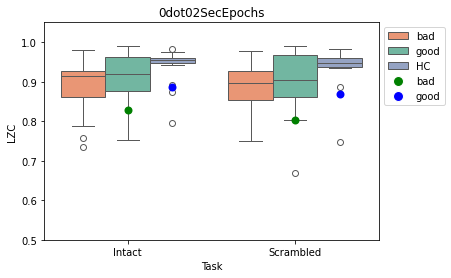

In [16]:
# #MSICU05 
### IT v ST ###
####### MOST UP TO DATE WITH NEW DATA #### MAY 8th 2024
####### MOST UP TO DATE #### MAY 2nd 2024

favorable_color = sns.color_palette("Set2")[0]
unfavorable_color = sns.color_palette("Set2")[1]
HC_colour = sns.color_palette("Set2")[2]

# Missing values are automatically removed using a strict listwise approach (= complete-case analysis)

#from workspace
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn#MAIN mAIN mANINN MAIN MAIN MAIN MAIn
# ssHC_ssPT
# PTgood, PTbad, & HC
# HC_ST='RS'
# 3am jan4th,2024
#####################################################################################################################    
##                                                                                                                 ##
##                 LOADING DATAFRAME & RESHAPING IT & ADDING LABELS    +  NEW DICTIONARIES                           ## 
##################################################################################################################### 
import string
#OLD #Uoutcomedic={'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'1','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'1','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'1','MSICU30':'1','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesNA = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'NA','NETICU05':'NA','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'NA','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'NA','NETICU30':'0','CCTC03':'NA','CCTC04':'1','CCTC05':'NA','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'NA','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'NA','MSICU29':'NA','MSICU30':'NA','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}#outcomesGuess = {'NETICU01':'1','NETICU02':'0','NETICU03':'0','NETICU04':'0','NETICU05':'1','NETICU06':'0','NETICU08':'1','NETICU11':'1','NETICU13':'0','NETICU15':'0','NETICU17':'1','NETICU18':'1','NETICU19':'1','NETICU20':'1','NETICU22':'0','NETICU24':'0','NETICU25':'0','NETICU27':'1','NETICU28':'0','NETICU29':'1','NETICU30':'0','CCTC03':'1','CCTC04':'1','CCTC05':'0','MSICU05':'1','MSICU07':'0','MSICU09':'0','MSICU10':'0','MSICU14':'0','MSICU15':'0','MSICU16':'0','MSICU18':'0','MSICU19':'1','MSICU21':'0','MSICU22':'1','MSICU26':'1','MSICU28':'1','MSICU29':'0','MSICU30':'0','HC01':'1','HC02':'1','HC03':'1','HC04':'1','HC05':'1','HC06':'1','HC07':'1','HC08':'1','HC09':'1','HC10':'1','HC11':'1','HC12':'1','HC13':'1','HC14':'1','HC15':'1','HC16':'1','HC17':'1','HC18':'1'}
#OLD #seddic={'CCTC03_IT':'ON','CCTC03_RS':'ON','CCTC03_ST':'ON','CCTC03part2_IT':'ON','CCTC03part2_RS':'ON','CCTC03part2_ST':'ON','CCTC04_IT':'ON','CCTC04_RS':'ON','CCTC04_RSredo':'ON','CCTC04_ST':'ON','CCTC05_IT':'ON','CCTC05_RS':'ON','CCTC05_ST':'ON','HC01_IT':'-','HC01_ST':'-','HC02_IT':'-','HC02_ST':'-','HC03_IT':'-','HC03_ST':'-','HC04_IT':'-','HC04_ST':'-','HC05_IT1st':'-','HC05_IT2nd':'-','HC05_ST':'-','HC06_IT':'-','HC06_ST':'-','HC07_IT':'-','HC07_ST':'-','HC08_IT':'-','HC08_ST':'-','HC09_IT':'-','HC09_ST':'-','HC10_IT':'-','HC10_ST':'-','HC11_IT':'-','HC11_ST':'-','HC12_IT':'-','HC12_ST':'-','HC13_IT':'-','HC13_ST':'-','HC14_IT':'-','HC14_ST':'-','HC15_IT':'-','HC15_ST':'-','HC16_IT':'-','HC16_ST':'-','HC17_IT':'-','HC17_ST':'-','HC18_IT':'-','HC18_ST':'-','MSICU05_IT':'OFF','MSICU05_RS':'OFF','MSICU05_ST':'OFF','MSICU05part2_IT':'OFF','MSICU05part2_RS':'OFF','MSICU05part2_ST':'OFF','MSICU07_IT':'OFF','MSICU07_RS':'OFF','MSICU07_ST':'OFF','MSICU09_IT':'OFF','MSICU09_RS':'OFF','MSICU09_ST':'OFF','MSICU09part2_IT':'OFF','MSICU09part2_RS':'OFF','MSICU09part2_ST':'OFF','MSICU10_IT':'OFF','MSICU10_RS':'OFF','MSICU10_ST':'OFF','MSICU14_IT':'OFF','MSICU14_RS':'OFF','MSICU14_ST':'OFF','MSICU15_IT':'ON','MSICU15_RS':'ON','MSICU15_ST':'ON','MSICU16_IT':'OFF','MSICU16_RS':'OFF','MSICU16_ST':'OFF','MSICU18_IT':'OFF','MSICU18_RS':'OFF','MSICU18_ST':'OFF','MSICU19_IT':'OFF','MSICU19_RS':'OFF','MSICU19_ST':'OFF','MSICU21_IT':'OFF','MSICU21_RS':'OFF','MSICU21_ST':'OFF','MSICU22_IT':'OFF','MSICU22_RS':'OFF','MSICU22_ST':'OFF','MSICU26_IT':'ON','MSICU26_RS':'ON','MSICU26_ST':'ON','MSICU28_IT':'OFF','MSICU28_RS':'OFF','MSICU28_ST':'OFF','MSICU29_IT':'OFF','MSICU29_RS':'OFF','MSICU29_ST':'OFF','MSICU30_IT':'OFF','MSICU30_RS':'OFF','MSICU30_ST':'OFF','NETICU01sedoff_IT':'ON','NETICU01sedoff_RS':'ON','NETICU01sedoff_ST':'ON','NETICU01sedon1_IT':'ON','NETICU01sedon1_RS':'ON','NETICU01sedon1_ST':'ON','NETICU02sedoff_IT':'OFF','NETICU02sedoff_RS':'OFF','NETICU02sedoff_ST':'OFF','NETICU02sedon1_IT':'ON','NETICU02sedon1_RS':'ON','NETICU02sedon1_ST':'ON','NETICU03sedoff_IT':'OFF','NETICU03sedoff_RS':'OFF','NETICU03sedoff_ST':'OFF','NETICU03sedon1_IT':'ON','NETICU03sedon1_RS':'ON','NETICU03sedon1_ST':'ON','NETICU04sedoff_IT':'OFF','NETICU04sedoff_RS':'OFF','NETICU04sedoff_ST':'OFF','NETICU04sedon1_IT':'ON','NETICU04sedon1_RS':'ON','NETICU04sedon1_ST':'ON','NETICU05sedoff_IT':'OFF','NETICU05sedoff_RS':'OFF','NETICU05sedoff_ST':'OFF','NETICU05sedon1_IT':'ON','NETICU05sedon1_RS':'ON','NETICU05sedon1_ST':'ON','NETICU06sedoff_IT':'OFF','NETICU06sedoff_RS':'OFF','NETICU06sedoff_ST':'OFF','NETICU06sedon1_IT':'ON','NETICU06sedon1_RS':'ON','NETICU06sedon1_ST':'ON','NETICU08sedoff_IT':'OFF','NETICU08sedoff_ST':'OFF','NETICU08sedon2_IT':'ON','NETICU08sedon2_RS':'ON','NETICU08sedon2_ST':'ON','NETICU11sedoff_IT':'OFF','NETICU11sedoff_RS':'OFF','NETICU11sedoff_ST':'OFF','NETICU11sedon1_IT':'ON','NETICU11sedon1_RS':'ON','NETICU11sedon1_ST':'ON','NETICU13sedoff_IT':'OFF','NETICU13sedoff_RS':'OFF','NETICU13sedoff_ST':'OFF','NETICU13sedon1_IT':'ON','NETICU13sedon1_RS':'ON','NETICU13sedon1_ST':'ON','NETICU15sedoff_IT':'OFF','NETICU15sedoff_RS':'OFF','NETICU15sedoff_ST':'OFF','NETICU15sedon1_IT':'ON','NETICU15sedon1_RS':'ON','NETICU15sedon1_ST':'ON','NETICU17sedoff_IT':'OFF','NETICU17sedoff_RS':'OFF','NETICU17sedoff_ST':'OFF','NETICU17sedon1_IT':'ON','NETICU17sedon1_RS':'ON','NETICU17sedon1_ST':'ON','NETICU18sedoff_RS':'OFF','NETICU18sedon1_IT':'ON','NETICU18sedon1_RS':'ON','NETICU18sedon1_ST':'ON','NETICU19sedoff_IT':'OFF','NETICU19sedoff_RS':'OFF','NETICU19sedoff_ST':'OFF','NETICU19sedon1_IT':'ON','NETICU19sedon1_RS':'ON','NETICU19sedon1_ST':'ON','NETICU20sedoff_RS':'OFF','NETICU20sedon1_IT':'ON','NETICU20sedon1_RS':'ON','NETICU20sedon1_ST':'ON','NETICU22sedoff_IT':'OFF','NETICU22sedoff_RS':'OFF','NETICU22sedoff_ST':'OFF','NETICU22sedon1_IT':'ON','NETICU22sedon1_RS':'ON','NETICU22sedon1_ST':'ON','NETICU24sedoff_IT':'OFF','NETICU24sedoff_RS':'OFF','NETICU24sedoff_ST':'OFF','NETICU24sedon1_IT':'ON','NETICU24sedon1_RS':'ON','NETICU24sedon1_ST':'ON','NETICU25sedoff_RS':'OFF','NETICU25sedon1_IT':'ON','NETICU25sedon1_RS':'ON','NETICU25sedon1_ST':'ON','NETICU27sedoff_IT':'OFF','NETICU27sedoff_RS':'OFF','NETICU27sedoff_ST':'OFF','NETICU27sedon1_IT':'ON','NETICU27sedon1_RS':'ON','NETICU27sedon1_ST':'ON','NETICU28sedoff_IT':'OFF','NETICU28sedoff_RS':'OFF','NETICU28sedoff_ST':'OFF','NETICU28sedon1_IT':'ON','NETICU28sedon1_RS':'ON','NETICU28sedon1_ST':'ON','NETICU29sedoff_IT':'OFF','NETICU29sedoff_RS':'OFF','NETICU29sedoff_ST':'OFF','NETICU29sedon1_IT':'ON','NETICU29sedon1_RS':'ON','NETICU29sedon1_ST':'ON','NETICU30sedoff_IT':'OFF','NETICU30sedoff_RS':'OFF','NETICU30sedoff_ST':'OFF','NETICU30sedon1_IT':'ON','NETICU30sedon1_RS':'ON','NETICU30sedon1_ST':'ON'}
#OLD #GCSdic={'CCTC03_IT':'3','CCTC03_RS':'3','CCTC03_ST':'3','CCTC03part2_IT':'3','CCTC03part2_RS':'3','CCTC03part2_ST':'3','CCTC04_IT':'3','CCTC04_RS':'3','CCTC04_RSredo':'3','CCTC04_ST':'3','CCTC05_IT':'3','CCTC05_RS':'3','CCTC05_ST':'3','HC01_IT':'15','HC01_ST':'15','HC02_IT':'15','HC02_ST':'15','HC03_IT':'15','HC03_ST':'15','HC04_IT':'15','HC04_ST':'15','HC05_IT1st':'15','HC05_IT2nd':'15','HC05_ST':'15','HC06_IT':'15','HC06_ST':'15','HC07_IT':'15','HC07_ST':'15','HC08_IT':'15','HC08_ST':'15','HC09_IT':'15','HC09_ST':'15','HC10_IT':'15','HC10_ST':'15','HC11_IT':'15','HC11_ST':'15','HC12_IT':'15','HC12_ST':'15','HC13_IT':'15','HC13_ST':'15','HC14_IT':'15','HC14_ST':'15','HC15_IT':'15','HC15_ST':'15','HC16_IT':'15','HC16_ST':'15','HC17_IT':'15','HC17_ST':'15','HC18_IT':'15','HC18_ST':'15','MSICU05_IT':'3','MSICU05_RS':'3','MSICU05_ST':'3','MSICU05part2_IT':'15','MSICU05part2_RS':'15','MSICU05part2_ST':'15','MSICU07_IT':'3','MSICU07_RS':'3','MSICU07_ST':'3','MSICU09_IT':'5','MSICU09_RS':'5','MSICU09_ST':'5','MSICU09part2_IT':'4','MSICU09part2_RS':'4','MSICU09part2_ST':'4','MSICU10_IT':'4','MSICU10_RS':'4','MSICU10_ST':'4','MSICU14_IT':'3','MSICU14_RS':'3','MSICU14_ST':'3','MSICU15_IT':'6','MSICU15_RS':'6','MSICU15_ST':'6','MSICU16_IT':'3','MSICU16_RS':'3','MSICU16_ST':'3','MSICU18_IT':'7','MSICU18_RS':'7','MSICU18_ST':'7','MSICU19_IT':'8','MSICU19_RS':'8','MSICU19_ST':'8','MSICU21_IT':'9','MSICU21_RS':'9','MSICU21_ST':'9','MSICU22_IT':'4','MSICU22_RS':'4','MSICU22_ST':'4','MSICU26_IT':'7','MSICU26_RS':'7','MSICU26_ST':'7','MSICU28_IT':'6','MSICU28_RS':'6','MSICU28_ST':'6','MSICU29_IT':'9','MSICU29_RS':'9','MSICU29_ST':'9','MSICU30_IT':'5','MSICU30_RS':'5','MSICU30_ST':'5','NETICU01sedoff_IT':'3','NETICU01sedoff_RS':'3','NETICU01sedoff_ST':'3','NETICU01sedon1_IT':'3','NETICU01sedon1_RS':'3','NETICU01sedon1_ST':'3','NETICU02sedoff_IT':'10','NETICU02sedoff_RS':'10','NETICU02sedoff_ST':'10','NETICU02sedon1_IT':'3','NETICU02sedon1_RS':'3','NETICU02sedon1_ST':'3','NETICU03sedoff_IT':'6','NETICU03sedoff_RS':'6','NETICU03sedoff_ST':'6','NETICU03sedon1_IT':'6','NETICU03sedon1_RS':'6','NETICU03sedon1_ST':'6','NETICU04sedoff_IT':'3','NETICU04sedoff_RS':'3','NETICU04sedoff_ST':'3','NETICU04sedon1_IT':'3','NETICU04sedon1_RS':'3','NETICU04sedon1_ST':'3','NETICU05sedoff_IT':'3','NETICU05sedoff_RS':'3','NETICU05sedoff_ST':'3','NETICU05sedon1_IT':'3','NETICU05sedon1_RS':'3','NETICU05sedon1_ST':'3','NETICU06sedoff_IT':'6','NETICU06sedoff_RS':'6','NETICU06sedoff_ST':'6','NETICU06sedon1_IT':'3','NETICU06sedon1_RS':'3','NETICU06sedon1_ST':'3','NETICU08sedoff_IT':'9','NETICU08sedoff_ST':'9','NETICU08sedon2_IT':'3','NETICU08sedon2_RS':'3','NETICU08sedon2_ST':'3','NETICU11sedoff_IT':'4','NETICU11sedoff_RS':'4','NETICU11sedoff_ST':'4','NETICU11sedon1_IT':'3','NETICU11sedon1_RS':'3','NETICU11sedon1_ST':'3','NETICU13sedoff_IT':'4','NETICU13sedoff_RS':'4','NETICU13sedoff_ST':'4','NETICU13sedon1_IT':'3','NETICU13sedon1_RS':'3','NETICU13sedon1_ST':'3','NETICU15sedoff_IT':'3','NETICU15sedoff_RS':'3','NETICU15sedoff_ST':'3','NETICU15sedon1_IT':'3','NETICU15sedon1_RS':'3','NETICU15sedon1_ST':'3','NETICU17sedoff_IT':'10','NETICU17sedoff_RS':'10','NETICU17sedoff_ST':'10','NETICU17sedon1_IT':'3','NETICU17sedon1_RS':'3','NETICU17sedon1_ST':'3','NETICU18sedoff_RS':'11','NETICU18sedon1_IT':'3','NETICU18sedon1_RS':'3','NETICU18sedon1_ST':'3','NETICU19sedoff_IT':'7','NETICU19sedoff_RS':'7','NETICU19sedoff_ST':'7','NETICU19sedon1_IT':'3','NETICU19sedon1_RS':'3','NETICU19sedon1_ST':'3','NETICU20sedoff_RS':'11','NETICU20sedon1_IT':'3','NETICU20sedon1_RS':'3','NETICU20sedon1_ST':'3','NETICU22sedoff_IT':'3','NETICU22sedoff_RS':'3','NETICU22sedoff_ST':'3','NETICU22sedon1_IT':'3','NETICU22sedon1_RS':'3','NETICU22sedon1_ST':'3','NETICU24sedoff_IT':'3','NETICU24sedoff_RS':'3','NETICU24sedoff_ST':'3','NETICU24sedon1_IT':'3','NETICU24sedon1_RS':'3','NETICU24sedon1_ST':'3','NETICU25sedoff_RS':'8','NETICU25sedon1_IT':'6','NETICU25sedon1_RS':'6','NETICU25sedon1_ST':'6','NETICU27sedoff_IT':'3','NETICU27sedoff_RS':'3','NETICU27sedoff_ST':'3','NETICU27sedon1_IT':'3','NETICU27sedon1_RS':'3','NETICU27sedon1_ST':'3','NETICU28sedoff_IT':'3','NETICU28sedoff_RS':'3','NETICU28sedoff_ST':'3','NETICU28sedon1_IT':'3','NETICU28sedon1_RS':'3','NETICU28sedon1_ST':'3','NETICU29sedoff_IT':'11','NETICU29sedoff_RS':'11','NETICU29sedoff_ST':'11','NETICU29sedon1_IT':'3','NETICU29sedon1_RS':'3','NETICU29sedon1_ST':'3','NETICU30sedoff_IT':'6','NETICU30sedoff_RS':'6','NETICU30sedoff_ST':'6','NETICU30sedon1_IT':'3','NETICU30sedon1_RS':'3','NETICU30sedon1_ST':'3'}
#OLD(57)# EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','CCTC03','CCTC04','CCTC05','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
#OLD(60)# PT=['CCTC03','CCTC03part2','CCTC04','CCTC05','MSICU05','MSICU05part2','MSICU07','MSICU09','MSICU09part2','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','NETICU01sedoff','NETICU01sedon1','NETICU02sedoff','NETICU02sedon1','NETICU03sedoff','NETICU03sedon1','NETICU04sedoff','NETICU04sedon1','NETICU05sedoff','NETICU05sedon1','NETICU06sedoff','NETICU06sedon1','NETICU08sedoff','NETICU08sedon2','NETICU11sedoff','NETICU11sedon1','NETICU13sedoff','NETICU13sedon1','NETICU15sedoff','NETICU15sedon1','NETICU17sedoff','NETICU17sedon1','NETICU18sedon1','NETICU19sedoff','NETICU19sedon1','NETICU20sedon1','NETICU22sedoff','NETICU22sedon1','NETICU24sedoff','NETICU24sedon1','NETICU25sedon1','NETICU27sedoff','NETICU27sedon1','NETICU28sedoff','NETICU28sedon1','NETICU29sedoff','NETICU29sedon1','NETICU30sedoff','NETICU30sedon1']
PT = ['CCTC03', 'CCTC03part2', 'CCTC04', 'CCTC05', 'CCTC07NETICUsedoff', 'CCTC07NETICUsedon1', 'CCTC07', 'MSICU05', 'MSICU05part2', 'MSICU07', 'MSICU09', 'MSICU09part2', 'MSICU10', 'MSICU14', 'MSICU15', 'MSICU16', 'MSICU18', 'MSICU19', 'MSICU21', 'MSICU22', 'MSICU26', 'MSICU28', 'MSICU29', 'MSICU30', 'MSICU32', 'MSICU38', 'MSICU42', 'MSICU43', 'MSICU47', 'NETICU01sedoff', 'NETICU01sedon1', 'NETICU02sedoff', 'NETICU02sedon1', 'NETICU03sedoff', 'NETICU03sedon1', 'NETICU04sedoff', 'NETICU04sedon1', 'NETICU05sedoff', 'NETICU05sedon1', 'NETICU06sedoff', 'NETICU06sedon1', 'NETICU08sedoff', 'NETICU08sedon2', 'NETICU11sedoff', 'NETICU11sedon1', 'NETICU13sedoff', 'NETICU13sedon1', 'NETICU15sedoff', 'NETICU15sedon1', 'NETICU17sedoff', 'NETICU17sedon1', 'NETICU18sedon1', 'NETICU19sedoff', 'NETICU19sedon1', 'NETICU20sedon1', 'NETICU22sedoff', 'NETICU22sedon1', 'NETICU24sedoff', 'NETICU24sedon1', 'NETICU25sedon1', 'NETICU27sedoff', 'NETICU27sedon1', 'NETICU28sedoff', 'NETICU28sedon1', 'NETICU29sedoff', 'NETICU29sedon1', 'NETICU30sedoff', 'NETICU30sedon1', 'NETICU31sedoff', 'NETICU31sedon1', 'NETICU33sedon1', 'NETICU38sedon1', 'NETICU40sedoff', 'NETICU40sedon1', 'NETICU41sedoff', 'NETICU41sedon1', 'NETICU41sedon2', 'NETICU46sedon1']
EVERYONE = ['NETICU01','NETICU02','NETICU03','NETICU04','NETICU05','NETICU06','NETICU08','NETICU11','NETICU13','NETICU15','NETICU17','NETICU18','NETICU19','NETICU20','NETICU22','NETICU24','NETICU25','NETICU27','NETICU28','NETICU29','NETICU30','NETICU31','NETICU33','NETICU38','NETICU40','NETICU41','NETICU46','CCTC03','CCTC04','CCTC05','CCTC07','CCTC07NETICU','MSICU05','MSICU07','MSICU09','MSICU10','MSICU14','MSICU15','MSICU16','MSICU18','MSICU19','MSICU21','MSICU22','MSICU26','MSICU28','MSICU29','MSICU30','MSICU32','MSICU38','MSICU42','MSICU43','MSICU47','HC01','HC02','HC03','HC04','HC05','HC06','HC07','HC08','HC09','HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17','HC18']
Uoutcomedic={'CCTC03_IT': '1', 'CCTC03_RS': '1', 'CCTC03_ST': '1', 'CCTC03part2_IT': '1', 'CCTC03part2_RS': '1', 'CCTC03part2_ST': '1', 'CCTC04_IT': '1', 'CCTC04_RS': '1', 'CCTC04_RSredo': '1', 'CCTC04_ST': '1', 'CCTC05_IT': '1', 'CCTC05_RS': '1', 'CCTC05_ST': '1', 'CCTC07NETICUsedoff_IT': '0', 'CCTC07NETICUsedoff_RS': '0', 'CCTC07NETICUsedoff_ST': '0', 'CCTC07NETICUsedon1_IT': '0', 'CCTC07NETICUsedon1_RS': '0', 'CCTC07NETICUsedon1_ST': '0', 'CCTC07_IT': '0', 'CCTC07_RS': '0', 'CCTC07_ST': '0', 'HC01_IT': '1', 'HC01_ST': '1', 'HC02_IT': '1', 'HC02_ST': '1', 'HC03_IT': '1', 'HC03_ST': '1', 'HC04_IT': '1', 'HC04_ST': '1', 'HC05_IT1st': '1', 'HC05_IT2nd': '1', 'HC05_ST': '1', 'HC06_IT': '1', 'HC06_ST': '1', 'HC07_IT': '1', 'HC07_ST': '1', 'HC08_IT': '1', 'HC08_ST': '1', 'HC09_IT': '1', 'HC09_ST': '1', 'HC10_IT': '1', 'HC10_ST': '1', 'HC11_IT': '1', 'HC11_ST': '1', 'HC12_IT': '1', 'HC12_ST': '1', 'HC13_IT': '1', 'HC13_ST': '1', 'HC14_IT': '1', 'HC14_ST': '1', 'HC15_IT': '1', 'HC15_ST': '1', 'HC16_IT': '1', 'HC16_ST': '1', 'HC17_IT': '1', 'HC17_ST': '1', 'HC18_IT': '1', 'HC18_ST': '1', 'MSICU05_IT': '1', 'MSICU05_RS': '1', 'MSICU05_ST': '1', 'MSICU05part2_IT': '1', 'MSICU05part2_RS': '1', 'MSICU05part2_ST': '1', 'MSICU07_IT': '0', 'MSICU07_RS': '0', 'MSICU07_ST': '0', 'MSICU09_IT': '0', 'MSICU09_RS': '0', 'MSICU09_ST': '0', 'MSICU09part2_IT': '0', 'MSICU09part2_RS': '0', 'MSICU09part2_ST': '0', 'MSICU10_IT': '0', 'MSICU10_RS': '0', 'MSICU10_ST': '0', 'MSICU14_IT': '0', 'MSICU14_RS': '0', 'MSICU14_ST': '0', 'MSICU15_IT': '0', 'MSICU15_RS': '0', 'MSICU15_ST': '0', 'MSICU16_IT': '0', 'MSICU16_RS': '0', 'MSICU16_ST': '0', 'MSICU18_IT': '0', 'MSICU18_RS': '0', 'MSICU18_ST': '0', 'MSICU19_IT': '1', 'MSICU19_RS': '1', 'MSICU19_ST': '1', 'MSICU21_IT': '0', 'MSICU21_RS': '0', 'MSICU21_ST': '0', 'MSICU22_IT': '1', 'MSICU22_RS': '1', 'MSICU22_ST': '1', 'MSICU26_IT': '1', 'MSICU26_RS': '1', 'MSICU26_ST': '1', 'MSICU28_IT': '1', 'MSICU28_RS': '1', 'MSICU28_ST': '1', 'MSICU29_IT': '1', 'MSICU29_RS': '1', 'MSICU29_ST': '1', 'MSICU30_IT': '1', 'MSICU30_RS': '1', 'MSICU30_ST': '1', 'MSICU32_IT': '0', 'MSICU32_RS': '0', 'MSICU32_ST': '0', 'MSICU38_IT': '0', 'MSICU38_RS': '0', 'MSICU38_ST': '0', 'MSICU42_IT': '1', 'MSICU42_RS': '1', 'MSICU42_ST': '1', 'MSICU43_IT': '0', 'MSICU43_RS': '0', 'MSICU43_ST': '0', 'MSICU47_IT': '1', 'MSICU47_RS': '1', 'MSICU47_ST': '1', 'NETICU01sedoff_IT': '1', 'NETICU01sedoff_RS': '1', 'NETICU01sedoff_ST': '1', 'NETICU01sedon1_IT': '1', 'NETICU01sedon1_RS': '1', 'NETICU01sedon1_ST': '1', 'NETICU02sedoff_IT': '0', 'NETICU02sedoff_RS': '0', 'NETICU02sedoff_ST': '0', 'NETICU02sedon1_IT': '0', 'NETICU02sedon1_RS': '0', 'NETICU02sedon1_ST': '0', 'NETICU03sedoff_IT': '0', 'NETICU03sedoff_RS': '0', 'NETICU03sedoff_ST': '0', 'NETICU03sedon1_IT': '0', 'NETICU03sedon1_RS': '0', 'NETICU03sedon1_ST': '0', 'NETICU04sedoff_IT': '1', 'NETICU04sedoff_RS': '1', 'NETICU04sedoff_ST': '1', 'NETICU04sedon1_IT': '1', 'NETICU04sedon1_RS': '1', 'NETICU04sedon1_ST': '1', 'NETICU05sedoff_IT': '1', 'NETICU05sedoff_RS': '1', 'NETICU05sedoff_ST': '1', 'NETICU05sedon1_IT': '1', 'NETICU05sedon1_RS': '1', 'NETICU05sedon1_ST': '1', 'NETICU06sedoff_IT': '0', 'NETICU06sedoff_RS': '0', 'NETICU06sedoff_ST': '0', 'NETICU06sedon1_IT': '0', 'NETICU06sedon1_RS': '0', 'NETICU06sedon1_ST': '0', 'NETICU08sedoff_IT': '1', 'NETICU08sedoff_ST': '1', 'NETICU08sedon2_IT': '1', 'NETICU08sedon2_RS': '1', 'NETICU08sedon2_ST': '1', 'NETICU11sedoff_IT': '1', 'NETICU11sedoff_RS': '1', 'NETICU11sedoff_ST': '1', 'NETICU11sedon1_IT': '1', 'NETICU11sedon1_RS': '1', 'NETICU11sedon1_ST': '1', 'NETICU13sedoff_IT': '0', 'NETICU13sedoff_RS': '0', 'NETICU13sedoff_ST': '0', 'NETICU13sedon1_IT': '0', 'NETICU13sedon1_RS': '0', 'NETICU13sedon1_ST': '0', 'NETICU15sedoff_IT': '0', 'NETICU15sedoff_RS': '0', 'NETICU15sedoff_ST': '0', 'NETICU15sedon1_IT': '0', 'NETICU15sedon1_RS': '0', 'NETICU15sedon1_ST': '0', 'NETICU17sedoff_IT': '1', 'NETICU17sedoff_RS': '1', 'NETICU17sedoff_ST': '1', 'NETICU17sedon1_IT': '1', 'NETICU17sedon1_RS': '1', 'NETICU17sedon1_ST': '1', 'NETICU18sedoff_RS': '1', 'NETICU18sedon1_IT': '1', 'NETICU18sedon1_RS': '1', 'NETICU18sedon1_ST': '1', 'NETICU19sedoff_IT': '1', 'NETICU19sedoff_RS': '1', 'NETICU19sedoff_ST': '1', 'NETICU19sedon1_IT': '1', 'NETICU19sedon1_RS': '1', 'NETICU19sedon1_ST': '1', 'NETICU20sedoff_RS': '1', 'NETICU20sedon1_IT': '1', 'NETICU20sedon1_RS': '1', 'NETICU20sedon1_ST': '1', 'NETICU22sedoff_IT': '0', 'NETICU22sedoff_RS': '0', 'NETICU22sedoff_ST': '0', 'NETICU22sedon1_IT': '0', 'NETICU22sedon1_RS': '0', 'NETICU22sedon1_ST': '0', 'NETICU24sedoff_IT': '0', 'NETICU24sedoff_RS': '0', 'NETICU24sedoff_ST': '0', 'NETICU24sedon1_IT': '0', 'NETICU24sedon1_RS': '0', 'NETICU24sedon1_ST': '0', 'NETICU25sedoff_RS': '0', 'NETICU25sedon1_IT': '0', 'NETICU25sedon1_RS': '0', 'NETICU25sedon1_ST': '0', 'NETICU27sedoff_IT': '1', 'NETICU27sedoff_RS': '1', 'NETICU27sedoff_ST': '1', 'NETICU27sedon1_IT': '1', 'NETICU27sedon1_RS': '1', 'NETICU27sedon1_ST': '1', 'NETICU28sedoff_IT': '0', 'NETICU28sedoff_RS': '0', 'NETICU28sedoff_ST': '0', 'NETICU28sedon1_IT': '0', 'NETICU28sedon1_RS': '0', 'NETICU28sedon1_ST': '0', 'NETICU29sedoff_IT': '1', 'NETICU29sedoff_RS': '1', 'NETICU29sedoff_ST': '1', 'NETICU29sedon1_IT': '1', 'NETICU29sedon1_RS': '1', 'NETICU29sedon1_ST': '1', 'NETICU30sedoff_IT': '0', 'NETICU30sedoff_RS': '0', 'NETICU30sedoff_ST': '0', 'NETICU30sedon1_IT': '0', 'NETICU30sedon1_RS': '0', 'NETICU30sedon1_ST': '0', 'NETICU31sedoff_IT': '1', 'NETICU31sedoff_RS': '1', 'NETICU31sedoff_ST': '1', 'NETICU31sedon1_IT': '1', 'NETICU31sedon1_ST': '1', 'NETICU31sedon2_RS': '1', 'NETICU33sedoff_RS': '0', 'NETICU33sedon1_IT': '0', 'NETICU33sedon1_RS': '0', 'NETICU33sedon1_ST': '0', 'NETICU38sedon1_IT': '0', 'NETICU38sedon1_RS': '0', 'NETICU38sedon1_ST': '0', 'NETICU40sedoff_IT': '0', 'NETICU40sedoff_RS': '0', 'NETICU40sedoff_ST': '0', 'NETICU40sedon1_IT': '0', 'NETICU40sedon1_RS': '0', 'NETICU40sedon1_ST': '0', 'NETICU41sedoff_IT': '0', 'NETICU41sedoff_RS': '0', 'NETICU41sedoff_ST': '0', 'NETICU41sedon1_IT': '0', 'NETICU41sedon1_RS': '0', 'NETICU41sedon1_ST': '0', 'NETICU41sedon2_IT': '0', 'NETICU41sedon2_RS': '0', 'NETICU41sedon2_ST': '0', 'NETICU46sedoff_RS': '1', 'NETICU46sedon1_IT': '1', 'NETICU46sedon1_RS': '1', 'NETICU46sedon1_ST': '1'}
seddic={'CCTC03_IT': 'ON', 'CCTC03_RS': 'ON', 'CCTC03_ST': 'ON', 'CCTC03part2_IT': 'ON', 'CCTC03part2_RS': 'ON', 'CCTC03part2_ST': 'ON', 'CCTC04_IT': 'ON', 'CCTC04_RS': 'ON', 'CCTC04_RSredo': 'ON', 'CCTC04_ST': 'ON', 'CCTC05_IT': 'ON', 'CCTC05_RS': 'ON', 'CCTC05_ST': 'ON', 'CCTC07NETICUsedoff_IT': 'OFF', 'CCTC07NETICUsedoff_RS': 'OFF', 'CCTC07NETICUsedoff_ST': 'OFF', 'CCTC07NETICUsedon1_IT': 'ON', 'CCTC07NETICUsedon1_RS': 'ON', 'CCTC07NETICUsedon1_ST': 'ON', 'CCTC07_IT': 'OFF', 'CCTC07_RS': 'OFF', 'CCTC07_ST': 'OFF', 'HC01_IT': '-', 'HC01_ST': '-', 'HC02_IT': '-', 'HC02_ST': '-', 'HC03_IT': '-', 'HC03_ST': '-', 'HC04_IT': '-', 'HC04_ST': '-', 'HC05_IT1st': '-', 'HC05_IT2nd': '-', 'HC05_ST': '-', 'HC06_IT': '-', 'HC06_ST': '-', 'HC07_IT': '-', 'HC07_ST': '-', 'HC08_IT': '-', 'HC08_ST': '-', 'HC09_IT': '-', 'HC09_ST': '-', 'HC10_IT': '-', 'HC10_ST': '-', 'HC11_IT': '-', 'HC11_ST': '-', 'HC12_IT': '-', 'HC12_ST': '-', 'HC13_IT': '-', 'HC13_ST': '-', 'HC14_IT': '-', 'HC14_ST': '-', 'HC15_IT': '-', 'HC15_ST': '-', 'HC16_IT': '-', 'HC16_ST': '-', 'HC17_IT': '-', 'HC17_ST': '-', 'HC18_IT': '-', 'HC18_ST': '-', 'MSICU05_IT': 'OFF', 'MSICU05_RS': 'OFF', 'MSICU05_ST': 'OFF', 'MSICU05part2_IT': 'OFF', 'MSICU05part2_RS': 'OFF', 'MSICU05part2_ST': 'OFF', 'MSICU07_IT': 'OFF', 'MSICU07_RS': 'OFF', 'MSICU07_ST': 'OFF', 'MSICU09_IT': 'OFF', 'MSICU09_RS': 'OFF', 'MSICU09_ST': 'OFF', 'MSICU09part2_IT': 'OFF', 'MSICU09part2_RS': 'OFF', 'MSICU09part2_ST': 'OFF', 'MSICU10_IT': 'OFF', 'MSICU10_RS': 'OFF', 'MSICU10_ST': 'OFF', 'MSICU14_IT': 'OFF', 'MSICU14_RS': 'OFF', 'MSICU14_ST': 'OFF', 'MSICU15_IT': 'ON', 'MSICU15_RS': 'ON', 'MSICU15_ST': 'ON', 'MSICU16_IT': 'OFF', 'MSICU16_RS': 'OFF', 'MSICU16_ST': 'OFF', 'MSICU18_IT': 'OFF', 'MSICU18_RS': 'OFF', 'MSICU18_ST': 'OFF', 'MSICU19_IT': 'OFF', 'MSICU19_RS': 'OFF', 'MSICU19_ST': 'OFF', 'MSICU21_IT': 'OFF', 'MSICU21_RS': 'OFF', 'MSICU21_ST': 'OFF', 'MSICU22_IT': 'OFF', 'MSICU22_RS': 'OFF', 'MSICU22_ST': 'OFF', 'MSICU26_IT': 'ON', 'MSICU26_RS': 'ON', 'MSICU26_ST': 'ON', 'MSICU28_IT': 'OFF', 'MSICU28_RS': 'OFF', 'MSICU28_ST': 'OFF', 'MSICU29_IT': 'OFF', 'MSICU29_RS': 'OFF', 'MSICU29_ST': 'OFF', 'MSICU30_IT': 'OFF', 'MSICU30_RS': 'OFF', 'MSICU30_ST': 'OFF', 'MSICU32_IT': 'ON', 'MSICU32_RS': 'ON', 'MSICU32_ST': 'ON', 'MSICU38_IT': 'OFF', 'MSICU38_RS': 'OFF', 'MSICU38_ST': 'OFF', 'MSICU42_IT': 'OFF', 'MSICU42_RS': 'OFF', 'MSICU42_ST': 'OFF', 'MSICU43_IT': 'OFF', 'MSICU43_RS': 'OFF', 'MSICU43_ST': 'OFF', 'MSICU47_IT': 'OFF', 'MSICU47_RS': 'OFF', 'MSICU47_ST': 'OFF', 'NETICU01sedoff_IT': 'ON', 'NETICU01sedoff_RS': 'ON', 'NETICU01sedoff_ST': 'ON', 'NETICU01sedon1_IT': 'ON', 'NETICU01sedon1_RS': 'ON', 'NETICU01sedon1_ST': 'ON', 'NETICU02sedoff_IT': 'OFF', 'NETICU02sedoff_RS': 'OFF', 'NETICU02sedoff_ST': 'OFF', 'NETICU02sedon1_IT': 'ON', 'NETICU02sedon1_RS': 'ON', 'NETICU02sedon1_ST': 'ON', 'NETICU03sedoff_IT': 'OFF', 'NETICU03sedoff_RS': 'OFF', 'NETICU03sedoff_ST': 'OFF', 'NETICU03sedon1_IT': 'ON', 'NETICU03sedon1_RS': 'ON', 'NETICU03sedon1_ST': 'ON', 'NETICU04sedoff_IT': 'OFF', 'NETICU04sedoff_RS': 'OFF', 'NETICU04sedoff_ST': 'OFF', 'NETICU04sedon1_IT': 'ON', 'NETICU04sedon1_RS': 'ON', 'NETICU04sedon1_ST': 'ON', 'NETICU05sedoff_IT': 'OFF', 'NETICU05sedoff_RS': 'OFF', 'NETICU05sedoff_ST': 'OFF', 'NETICU05sedon1_IT': 'ON', 'NETICU05sedon1_RS': 'ON', 'NETICU05sedon1_ST': 'ON', 'NETICU06sedoff_IT': 'OFF', 'NETICU06sedoff_RS': 'OFF', 'NETICU06sedoff_ST': 'OFF', 'NETICU06sedon1_IT': 'ON', 'NETICU06sedon1_RS': 'ON', 'NETICU06sedon1_ST': 'ON', 'NETICU08sedoff_IT': 'OFF', 'NETICU08sedoff_ST': 'OFF', 'NETICU08sedon2_IT': 'ON', 'NETICU08sedon2_RS': 'ON', 'NETICU08sedon2_ST': 'ON', 'NETICU11sedoff_IT': 'OFF', 'NETICU11sedoff_RS': 'OFF', 'NETICU11sedoff_ST': 'OFF', 'NETICU11sedon1_IT': 'ON', 'NETICU11sedon1_RS': 'ON', 'NETICU11sedon1_ST': 'ON', 'NETICU13sedoff_IT': 'OFF', 'NETICU13sedoff_RS': 'OFF', 'NETICU13sedoff_ST': 'OFF', 'NETICU13sedon1_IT': 'ON', 'NETICU13sedon1_RS': 'ON', 'NETICU13sedon1_ST': 'ON', 'NETICU15sedoff_IT': 'OFF', 'NETICU15sedoff_RS': 'OFF', 'NETICU15sedoff_ST': 'OFF', 'NETICU15sedon1_IT': 'ON', 'NETICU15sedon1_RS': 'ON', 'NETICU15sedon1_ST': 'ON', 'NETICU17sedoff_IT': 'OFF', 'NETICU17sedoff_RS': 'OFF', 'NETICU17sedoff_ST': 'OFF', 'NETICU17sedon1_IT': 'ON', 'NETICU17sedon1_RS': 'ON', 'NETICU17sedon1_ST': 'ON', 'NETICU18sedoff_RS': 'OFF', 'NETICU18sedon1_IT': 'ON', 'NETICU18sedon1_RS': 'ON', 'NETICU18sedon1_ST': 'ON', 'NETICU19sedoff_IT': 'OFF', 'NETICU19sedoff_RS': 'OFF', 'NETICU19sedoff_ST': 'OFF', 'NETICU19sedon1_IT': 'ON', 'NETICU19sedon1_RS': 'ON', 'NETICU19sedon1_ST': 'ON', 'NETICU20sedoff_RS': 'OFF', 'NETICU20sedon1_IT': 'ON', 'NETICU20sedon1_RS': 'ON', 'NETICU20sedon1_ST': 'ON', 'NETICU22sedoff_IT': 'OFF', 'NETICU22sedoff_RS': 'OFF', 'NETICU22sedoff_ST': 'OFF', 'NETICU22sedon1_IT': 'ON', 'NETICU22sedon1_RS': 'ON', 'NETICU22sedon1_ST': 'ON', 'NETICU24sedoff_IT': 'OFF', 'NETICU24sedoff_RS': 'OFF', 'NETICU24sedoff_ST': 'OFF', 'NETICU24sedon1_IT': 'ON', 'NETICU24sedon1_RS': 'ON', 'NETICU24sedon1_ST': 'ON', 'NETICU25sedoff_RS': 'OFF', 'NETICU25sedon1_IT': 'ON', 'NETICU25sedon1_RS': 'ON', 'NETICU25sedon1_ST': 'ON', 'NETICU27sedoff_IT': 'OFF', 'NETICU27sedoff_RS': 'OFF', 'NETICU27sedoff_ST': 'OFF', 'NETICU27sedon1_IT': 'ON', 'NETICU27sedon1_RS': 'ON', 'NETICU27sedon1_ST': 'ON', 'NETICU28sedoff_IT': 'OFF', 'NETICU28sedoff_RS': 'OFF', 'NETICU28sedoff_ST': 'OFF', 'NETICU28sedon1_IT': 'ON', 'NETICU28sedon1_RS': 'ON', 'NETICU28sedon1_ST': 'ON', 'NETICU29sedoff_IT': 'OFF', 'NETICU29sedoff_RS': 'OFF', 'NETICU29sedoff_ST': 'OFF', 'NETICU29sedon1_IT': 'ON', 'NETICU29sedon1_RS': 'ON', 'NETICU29sedon1_ST': 'ON', 'NETICU30sedoff_IT': 'OFF', 'NETICU30sedoff_RS': 'OFF', 'NETICU30sedoff_ST': 'OFF', 'NETICU30sedon1_IT': 'ON', 'NETICU30sedon1_RS': 'ON', 'NETICU30sedon1_ST': 'ON', 'NETICU31sedoff_IT': 'OFF', 'NETICU31sedoff_RS': 'OFF', 'NETICU31sedoff_ST': 'OFF', 'NETICU31sedon1_IT': 'ON', 'NETICU31sedon1_ST': 'ON', 'NETICU31sedon2_RS': 'ON', 'NETICU33sedoff_RS': 'OFF', 'NETICU33sedon1_IT': 'ON', 'NETICU33sedon1_RS': 'ON', 'NETICU33sedon1_ST': 'ON', 'NETICU38sedon1_IT': 'ON', 'NETICU38sedon1_RS': 'ON', 'NETICU38sedon1_ST': 'ON', 'NETICU40sedoff_IT': 'OFF', 'NETICU40sedoff_RS': 'OFF', 'NETICU40sedoff_ST': 'OFF', 'NETICU40sedon1_IT': 'ON', 'NETICU40sedon1_RS': 'ON', 'NETICU40sedon1_ST': 'ON', 'NETICU41sedoff_IT': 'OFF', 'NETICU41sedoff_RS': 'OFF', 'NETICU41sedoff_ST': 'OFF', 'NETICU41sedon1_IT': 'ON', 'NETICU41sedon1_RS': 'ON', 'NETICU41sedon1_ST': 'ON', 'NETICU41sedon2_IT': 'ON', 'NETICU41sedon2_RS': 'ON', 'NETICU41sedon2_ST': 'ON', 'NETICU46sedoff_RS': 'OFF', 'NETICU46sedon1_IT': 'ON', 'NETICU46sedon1_RS': 'ON', 'NETICU46sedon1_ST': 'ON'}
GCSdic={'CCTC03_IT': '3', 'CCTC03_RS': '3', 'CCTC03_ST': '3', 'CCTC03part2_IT': '3', 'CCTC03part2_RS': '3', 'CCTC03part2_ST': '3', 'CCTC04_IT': '3', 'CCTC04_RS': '3', 'CCTC04_RSredo': '3', 'CCTC04_ST': '3', 'CCTC05_IT': '3', 'CCTC05_RS': '3', 'CCTC05_ST': '3', 'CCTC07NETICUsedoff_IT': '7', 'CCTC07NETICUsedoff_RS': '7', 'CCTC07NETICUsedoff_ST': '7', 'CCTC07NETICUsedon1_IT': '4', 'CCTC07NETICUsedon1_RS': '4', 'CCTC07NETICUsedon1_ST': '4', 'CCTC07_IT': '5', 'CCTC07_RS': '5', 'CCTC07_ST': '5', 'HC01_IT': '15', 'HC01_ST': '15', 'HC02_IT': '15', 'HC02_ST': '15', 'HC03_IT': '15', 'HC03_ST': '15', 'HC04_IT': '15', 'HC04_ST': '15', 'HC05_IT1st': '15', 'HC05_IT2nd': '15', 'HC05_ST': '15', 'HC06_IT': '15', 'HC06_ST': '15', 'HC07_IT': '15', 'HC07_ST': '15', 'HC08_IT': '15', 'HC08_ST': '15', 'HC09_IT': '15', 'HC09_ST': '15', 'HC10_IT': '15', 'HC10_ST': '15', 'HC11_IT': '15', 'HC11_ST': '15', 'HC12_IT': '15', 'HC12_ST': '15', 'HC13_IT': '15', 'HC13_ST': '15', 'HC14_IT': '15', 'HC14_ST': '15', 'HC15_IT': '15', 'HC15_ST': '15', 'HC16_IT': '15', 'HC16_ST': '15', 'HC17_IT': '15', 'HC17_ST': '15', 'HC18_IT': '15', 'HC18_ST': '15', 'MSICU05_IT': '3', 'MSICU05_RS': '3', 'MSICU05_ST': '3', 'MSICU05part2_IT': '15', 'MSICU05part2_RS': '15', 'MSICU05part2_ST': '15', 'MSICU07_IT': '3', 'MSICU07_RS': '3', 'MSICU07_ST': '3', 'MSICU09_IT': '5', 'MSICU09_RS': '5', 'MSICU09_ST': '5', 'MSICU09part2_IT': '4', 'MSICU09part2_RS': '4', 'MSICU09part2_ST': '4', 'MSICU10_IT': '4', 'MSICU10_RS': '4', 'MSICU10_ST': '4', 'MSICU14_IT': '3', 'MSICU14_RS': '3', 'MSICU14_ST': '3', 'MSICU15_IT': '6', 'MSICU15_RS': '6', 'MSICU15_ST': '6', 'MSICU16_IT': '3', 'MSICU16_RS': '3', 'MSICU16_ST': '3', 'MSICU18_IT': '7', 'MSICU18_RS': '7', 'MSICU18_ST': '7', 'MSICU19_IT': '8', 'MSICU19_RS': '8', 'MSICU19_ST': '8', 'MSICU21_IT': '9', 'MSICU21_RS': '9', 'MSICU21_ST': '9', 'MSICU22_IT': '4', 'MSICU22_RS': '4', 'MSICU22_ST': '4', 'MSICU26_IT': '7', 'MSICU26_RS': '7', 'MSICU26_ST': '7', 'MSICU28_IT': '6', 'MSICU28_RS': '6', 'MSICU28_ST': '6', 'MSICU29_IT': '9', 'MSICU29_RS': '9', 'MSICU29_ST': '9', 'MSICU30_IT': '5', 'MSICU30_RS': '5', 'MSICU30_ST': '5', 'MSICU32_IT': '3', 'MSICU32_RS': '3', 'MSICU32_ST': '3', 'MSICU38_IT': '5', 'MSICU38_RS': '5', 'MSICU38_ST': '5', 'MSICU42_IT': '6', 'MSICU42_RS': '6', 'MSICU42_ST': '6', 'MSICU43_IT': '9', 'MSICU43_RS': '9', 'MSICU43_ST': '9', 'MSICU47_IT': '6', 'MSICU47_RS': '6', 'MSICU47_ST': '6', 'NETICU01sedoff_IT': '3', 'NETICU01sedoff_RS': '3', 'NETICU01sedoff_ST': '3', 'NETICU01sedon1_IT': '3', 'NETICU01sedon1_RS': '3', 'NETICU01sedon1_ST': '3', 'NETICU02sedoff_IT': '10', 'NETICU02sedoff_RS': '10', 'NETICU02sedoff_ST': '10', 'NETICU02sedon1_IT': '3', 'NETICU02sedon1_RS': '3', 'NETICU02sedon1_ST': '3', 'NETICU03sedoff_IT': '6', 'NETICU03sedoff_RS': '6', 'NETICU03sedoff_ST': '6', 'NETICU03sedon1_IT': '6', 'NETICU03sedon1_RS': '6', 'NETICU03sedon1_ST': '6', 'NETICU04sedoff_IT': '3', 'NETICU04sedoff_RS': '3', 'NETICU04sedoff_ST': '3', 'NETICU04sedon1_IT': '3', 'NETICU04sedon1_RS': '3', 'NETICU04sedon1_ST': '3', 'NETICU05sedoff_IT': '3', 'NETICU05sedoff_RS': '3', 'NETICU05sedoff_ST': '3', 'NETICU05sedon1_IT': '3', 'NETICU05sedon1_RS': '3', 'NETICU05sedon1_ST': '3', 'NETICU06sedoff_IT': '6', 'NETICU06sedoff_RS': '6', 'NETICU06sedoff_ST': '6', 'NETICU06sedon1_IT': '3', 'NETICU06sedon1_RS': '3', 'NETICU06sedon1_ST': '3', 'NETICU08sedoff_IT': '9', 'NETICU08sedoff_ST': '9', 'NETICU08sedon2_IT': '3', 'NETICU08sedon2_RS': '3', 'NETICU08sedon2_ST': '3', 'NETICU11sedoff_IT': '4', 'NETICU11sedoff_RS': '4', 'NETICU11sedoff_ST': '4', 'NETICU11sedon1_IT': '3', 'NETICU11sedon1_RS': '3', 'NETICU11sedon1_ST': '3', 'NETICU13sedoff_IT': '4', 'NETICU13sedoff_RS': '4', 'NETICU13sedoff_ST': '4', 'NETICU13sedon1_IT': '3', 'NETICU13sedon1_RS': '3', 'NETICU13sedon1_ST': '3', 'NETICU15sedoff_IT': '3', 'NETICU15sedoff_RS': '3', 'NETICU15sedoff_ST': '3', 'NETICU15sedon1_IT': '3', 'NETICU15sedon1_RS': '3', 'NETICU15sedon1_ST': '3', 'NETICU17sedoff_IT': '10', 'NETICU17sedoff_RS': '10', 'NETICU17sedoff_ST': '10', 'NETICU17sedon1_IT': '3', 'NETICU17sedon1_RS': '3', 'NETICU17sedon1_ST': '3', 'NETICU18sedoff_RS': '11', 'NETICU18sedon1_IT': '3', 'NETICU18sedon1_RS': '3', 'NETICU18sedon1_ST': '3', 'NETICU19sedoff_IT': '7', 'NETICU19sedoff_RS': '7', 'NETICU19sedoff_ST': '7', 'NETICU19sedon1_IT': '3', 'NETICU19sedon1_RS': '3', 'NETICU19sedon1_ST': '3', 'NETICU20sedoff_RS': '11', 'NETICU20sedon1_IT': '3', 'NETICU20sedon1_RS': '3', 'NETICU20sedon1_ST': '3', 'NETICU22sedoff_IT': '3', 'NETICU22sedoff_RS': '3', 'NETICU22sedoff_ST': '3', 'NETICU22sedon1_IT': '3', 'NETICU22sedon1_RS': '3', 'NETICU22sedon1_ST': '3', 'NETICU24sedoff_IT': '3', 'NETICU24sedoff_RS': '3', 'NETICU24sedoff_ST': '3', 'NETICU24sedon1_IT': '3', 'NETICU24sedon1_RS': '3', 'NETICU24sedon1_ST': '3', 'NETICU25sedoff_RS': '8', 'NETICU25sedon1_IT': '6', 'NETICU25sedon1_RS': '6', 'NETICU25sedon1_ST': '6', 'NETICU27sedoff_IT': '3', 'NETICU27sedoff_RS': '3', 'NETICU27sedoff_ST': '3', 'NETICU27sedon1_IT': '3', 'NETICU27sedon1_RS': '3', 'NETICU27sedon1_ST': '3', 'NETICU28sedoff_IT': '3', 'NETICU28sedoff_RS': '3', 'NETICU28sedoff_ST': '3', 'NETICU28sedon1_IT': '3', 'NETICU28sedon1_RS': '3', 'NETICU28sedon1_ST': '3', 'NETICU29sedoff_IT': '11', 'NETICU29sedoff_RS': '11', 'NETICU29sedoff_ST': '11', 'NETICU29sedon1_IT': '3', 'NETICU29sedon1_RS': '3', 'NETICU29sedon1_ST': '3', 'NETICU30sedoff_IT': '6', 'NETICU30sedoff_RS': '6', 'NETICU30sedoff_ST': '6', 'NETICU30sedon1_IT': '3', 'NETICU30sedon1_RS': '3', 'NETICU30sedon1_ST': '3', 'NETICU31sedoff_IT': '10', 'NETICU31sedoff_RS': '10', 'NETICU31sedoff_ST': '10', 'NETICU31sedon1_IT': '3', 'NETICU31sedon1_ST': '3', 'NETICU31sedon2_RS': '6', 'NETICU33sedoff_RS': '5', 'NETICU33sedon1_IT': '3', 'NETICU33sedon1_RS': '3', 'NETICU33sedon1_ST': '3', 'NETICU38sedon1_IT': '3', 'NETICU38sedon1_RS': '3', 'NETICU38sedon1_ST': '3', 'NETICU40sedoff_IT': '9', 'NETICU40sedoff_RS': '9', 'NETICU40sedoff_ST': '9', 'NETICU40sedon1_IT': '3', 'NETICU40sedon1_RS': '3', 'NETICU40sedon1_ST': '3', 'NETICU41sedoff_IT': '3', 'NETICU41sedoff_RS': '3', 'NETICU41sedoff_ST': '3', 'NETICU41sedon1_IT': '3', 'NETICU41sedon1_RS': '3', 'NETICU41sedon1_ST': '3', 'NETICU41sedon2_IT': '3', 'NETICU41sedon2_RS': '3', 'NETICU41sedon2_ST': '3', 'NETICU46sedoff_RS': '8', 'NETICU46sedon1_IT': '3', 'NETICU46sedon1_RS': '3', 'NETICU46sedon1_ST': '3'}
######################################################################################################################


#-----------------------------------------------------------------------------------------#
# loading LZC values
#'TenSecEpochs_delta' lots of sig
#'TenSecEpochs_gamma' Favorable on top
#'TenSecEpochs_alpha'
# window = 'TenSecEpochs_delta'#'TenSecEpochs' #'10secEpochs #'TenSecEpochs_woutreref'

for window in ['0dot02SecEpochs']:#['TenSecEpochs']:#,'TenSecEpochs_delta','TenSecEpochs_theta','TenSecEpochs_alpha','TenSecEpochs_beta','TenSecEpochs_gamma']:
# for window in ['0dot2SecEpochs','0dot2SecEpochs_delta','0dot2SecEpochs_theta','0dot2SecEpochs_alpha','0dot2SecEpochs_beta','0dot2SecEpochs_gamma']:
# window = 'TenSecEpochs'
    print(f'\n\n\n\n\n#############################################################\n{window}\n#############################################################')
    print (f'*******---> {window} <---*******')
    vars()[window]= pd.read_csv(f'./results/NewDataResults/LZC/{window}/dfLZC.csv')# vars()[window]= pd.read_csv(f'./results/LZC/{window}/dfLZC.csv')
    vars()[window].rename(columns={vars()[window].columns[0]: 'ID'}, inplace=True)
    vars()[window].rename(columns={vars()[window].columns[1]: 'LZC'}, inplace=True)
    vars()[window].set_index('ID', inplace=True)
    df = vars()[window].copy()
    ssfnames = [f for f in df.index if 'HC05_IT1st' not in f]
    ssHC = [f for f in df.index if 'HC' in f]
    dfHC = df.copy().loc[ssHC]
    df = df.copy().loc[ssfnames]
    OGdf = df.copy()
    #display(df)

    # load/read dict
    import json
    with open(f'./results/NewDataResults/LZC/{window}/dict_{window}.json', 'r') as file:
    # with open(f'./results/LZC/{window}/dict_{window}.json', 'r') as file:
        loaded_dict = json.load(file)
    segsdf = pd.DataFrame(loaded_dict)
    #display(segsdf)
    #-----------------------------------------------------------------------------------------#
    GCS = []
    sedlist = []
    sedlist2=[]
    Uoutcomelist=[]
    studylist=[]
    Scan=[]
    Tlist=[]
    hplist = []
    T2list=[]
    ID2list=[]
    IDlist=[]
    for f in df.index:
        ID = ((f.split('_')[0]).split('part2')[0]).split('sed')[0]
        IDlist.append(ID)
        ID2 = f.split('_')[0]
        ID2list.append(ID2)
        #HC or PT 
        hp = 'hc' if 'HC' in f else 'pt'
        hplist.append(hp)
        #Task (RS/ST/IT)
        for Task in ['RS','ST','IT']:
            if Task in f:
                T = Task
                Tlist.append(T)
        T2=(f.split('_'))[1]
        T2list.append(T2)
        #part2/sedon/sedoff/-
        S = 'part2' if 'part2' in f else 'sed'+((f.split('sed')[1]).split('_')[0]) if 'sed' in f else '-'
        Scan.append(S)
        #studylist(NETICU/MIMIC/control)
        NMc = 'NETICU' if 'NETICU' in f else 'control' if 'HC' in f else 'MIMIC'
        studylist.append(NMc)
        #outcomes 
        #for E in EVERYONE:
            #if E+'_' in f or E+'sed' in f or E+'part' in f:
                #UO=Uoutcomedic[E]#O= outcomesNA[E]#outcomeslist.append(O)#O2= outcomesGuess[E]#guessoutcomeslist.append(O2) 
                #Uoutcomelist.append(UO)
        U=Uoutcomedic[f]
        Uoutcomelist.append(U)
        #sed & GCS
        sedlist.append(seddic[f])
        SEDLIST =['OFF' if element == '-' else element for element in sedlist]
        GCS.append(GCSdic[f])
    # Add Labels
    df.insert(0,'sed',SEDLIST)
    df.insert(0,'GCS',GCS)
    df['GCS'] = pd.to_numeric(df['GCS'])
    GCS_8=list(df['GCS'].apply(lambda x: 'under8' if x < 8 else '8ABOVE'))
    GCS_7=list(df['GCS'].apply(lambda x: 'under7' if x < 7 else '7ABOVE'))
    GCS_6=list(df['GCS'].apply(lambda x: 'under6' if x < 6 else '6ABOVE'))
    GCS_5=list(df['GCS'].apply(lambda x: 'under5' if x < 5 else '5ABOVE'))
    df.insert(0,'GCS_8',GCS_8)
    df.insert(0,'GCS_7',GCS_7)
    df.insert(0,'GCS_6',GCS_6)
    df.insert(0,'GCS_5',GCS_5)
    df.insert(0, 'Uoutcome', Uoutcomelist)# df.insert(0, 'outcome', outcomeslist)# df.insert(0, 'GuessOutcome', guessoutcomeslist)
    df.insert(0, 'participant_id', IDlist)
    df.insert(0, 'ID2list', ID2list)
    df.insert(0, 'Task2', T2list)
    df.insert(0, 'Task', Tlist)
    df.insert(0, 'Scan', Scan)
    df.insert(0,'sed2',sedlist)
    df.insert(0, 'study', studylist)
    df.insert(0, 'HP', hplist)

    
    
    
    #===========###==REMOVE MSICUpart2===###===========#
    #                                                  #
    df = df[~df.index.str.contains('MSICU05part2')]    #
    print ('removed MSICU05part2',df.shape)            #
    #                                                  #
    #==================================================#
    
    
    
    
    
    ### MAIN MAIN <DATA-PREP> MAIN MAIN ###
    #######################################
    #----------------------------------------#
    ssHC = df.copy()[df.copy().index.str.contains('HC')]
    dfsedOFF = df[(df['sed']=='OFF')&(~df.index.str.contains('HC'))&(df['Task']!='RS')]
    ssPT=dfsedOFF.copy()
    ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
    for i in range(1,(int((ssPT.shape[0])/2))+1):
        a='p'+str(i).zfill(2)
        b='p'+str(i).zfill(2)
        ID.append(a)
        ID.append(b)
    ssPT.reset_index(inplace=True)
    ssPT.drop('ID',axis=1,inplace=True)
    ssPT.insert(0,'ID',ID)
    ssPT = ssPT[['ID','Task', 'Uoutcome', 'LZC']]
    ssPToutcome = list(ssPT['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
    ssPT.drop('Uoutcome', axis=1, inplace=True)
    ssPT.insert(1,'Outcome',ssPToutcome)
    # # # #
    HCID=[]# HCID=['p42','p42','p43','p43','p44','p44','p45','p45','p46','p46','p47','p47','p48','p48','p49','p49','p50','p50','p51','p51','p52','p52','p53','p53','p54','p54','p55','p55','p56','p56','p57','p57','p58','p58','p59','p59']
    num = int((ID[(len(ID))-1])[1:]) # the last number from the patient list of ID's
    for i in range(num+1, num+19):
        a='p'+str(i).zfill(2)
        b='p'+str(i).zfill(2)
        HCID.append(a)
        HCID.append(b)
    ssHC.reset_index(inplace=True)
    ssHC.drop('ID',axis=1,inplace=True)
    ssHC.insert(0,'ID',HCID)
    ssHC = ssHC[['ID','Task', 'Uoutcome', 'LZC']]
    HCoutcome = list(ssHC['Uoutcome'].apply(lambda x: 'HC' if x == '1' else 'error'))
    ssHC.drop('Uoutcome', axis=1, inplace=True)
    ssHC.insert(1,'Outcome',HCoutcome)
    # # # #
    ssHC_ssPT = pd.concat([ssPT, ssHC])# CONCATINATE WITH ssHC
    ssHC_ssPT.reset_index(drop=True, inplace=True)
    #----------------------------------------#
    #> long format
    dfsedOFF = dfsedOFF[['Task', 'Uoutcome', 'LZC']]
    outcome = list(dfsedOFF['Uoutcome'].apply(lambda x: 'good' if x == '1' else 'bad'))
    dfsedOFF.drop('Uoutcome', axis=1, inplace=True)
    dfsedOFF.insert(0,'Outcome',outcome)
    dfid=list(dfsedOFF.index)
    ID=[]#ID=['p01','p01','p02','p02','p03','p03','p04','p04','p05','p05','p06','p06','p07','p07','p08','p08','p09','p09','p10','p10','p11','p11','p12','p12','p13','p13','p14','p14','p15','p15','p16','p16','p17','p17','p18','p18','p19','p19','p20','p20','p21','p21','p22','p22','p23','p23','p24','p24','p25','p25','p26','p26','p27','p27','p28','p28','p29','p29','p30','p30','p31','p31','p32','p32','p33','p33','p34','p34','p35','p35','p36','p36','p37','p37','p38','p38','p39','p39','p40','p40','p41','p41']
    for i in range(1,(int((dfsedOFF.shape[0])/2))+1):
        a='p'+str(i).zfill(2)
        b='p'+str(i).zfill(2)
        ID.append(a)
        ID.append(b)
    dfsedOFF.reset_index(inplace=True)
    dfsedOFF.drop('ID',axis=1,inplace=True)
    dfsedOFF.insert(0,'ID',ID) # p1&p2=same person, p4&p5=same person
    #--------------------##Alternative
    dfsedOFFalt = dfsedOFF.copy()#Alternative
    groupvar=list(dfsedOFFalt['Outcome'] + '_' + dfsedOFFalt['Task'])
    dfsedOFFalt.drop('Outcome', axis=1, inplace=True)
    dfsedOFFalt.drop('Task', axis=1, inplace=True)
    dfsedOFFalt.insert(1,'groupvar',groupvar)
    # meandf.columns = [col[0]+col[1] for col in meandf.columns]
    # meandf['group'] = meandf['Task'].astype(str) + '_' + meandf['Outcome'].astype(str)
    #--------------------#


    ################################################################################################################    
    ##                                                                                                            ##
    ##                                                Statistics                                                  ## 
    ################################################################################################################ 
    #print('\n\n\n\n\n#############################################################\ndfsedOFF - Statistics\n#############################################################')

    
    ################################################################################################################    
    ##                                                3X2                                                         ##
    ##                                           Statistics  2   w/ HC                                            ## 
    ################################################################################################################ 
    #print('\n\n\n\n\n#############################################################\nssHC_ssP - Statistics\n#############################################################')
    df=ssHC_ssPT.copy()
    data = ssHC_ssPT.copy()
    stackeddf = ssHC_ssPT.copy()
    #******************************************************************#
    # Table 1 - Descriptive statistics
    #******************************************************************#
    meandf = stackeddf.copy()
    means = stackeddf.groupby('Outcome')['LZC'].mean()# calculate the mean of the 'value' column for each category
    meas=means.sort_values(ascending=False)
    means2 = stackeddf.groupby('Task')['LZC'].mean()
    algos=means2.sort_values(ascending=False)
    # meandf.columns = [col[0]+col[1] for col in meandf.columns]
    meandf['group'] = meandf['Outcome'].astype(str) + '_' + meandf['Task'].astype(str)
    mix = meandf.groupby('group')['LZC'].mean()
    mix2=mix.sort_values(ascending=False)
    # print(meas)
    # print(algos)
    # print (mix2,'\n')
    # desc_stats = df.groupby(['Outcome', 'Task'])['LZC'].describe()
    # display(desc_stats)
    import scipy.stats as stats #wont workw/out imports
    grouped = df.groupby(['Outcome', 'Task'])
    stats_df = pd.DataFrame()
    stats_df['Sample Size'] = grouped['LZC'].count()
    stats_df['Mean (M)'] = grouped['LZC'].mean()
    stats_df['Standard Deviation (SD)'] = grouped['LZC'].std()
    stats_df['Standard Error of the Mean (SEM)'] = grouped['LZC'].sem()
    stats_df['Skewness'] = grouped['LZC'].apply(lambda x: stats.skew(x))
    stats_df['Kurtosis'] = grouped['LZC'].apply(lambda x: stats.kurtosis(x))
    display(stats_df)
    #******************************************************************#
    # Table 2 - Mixed-design (split-plot) Two-way ANOVA
    #******************************************************************#
    import pingouin as pg
    aov = pg.mixed_anova(data, dv='LZC', 
                  within='Task',
                  between='Outcome',
                  correction='auto',
                  effsize='ng2',
                  subject='ID')

    #Posthoc
    stats = pg.pairwise_tests(data, dv='LZC',
                              between='Outcome', 
                              within='Task',
                              subject='ID',
                              padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                              effsize='hedges', # Hedges g
                              correction='auto',
                              within_first=True)
    #Posthoc
    stats2 = pg.pairwise_tests(data, dv='LZC',
                              between='Outcome', 
                              within='Task',
                              subject='ID',
                              padjust='fdr_bh',#=Benjamini/Hochberg FDR correction#'fdr_by',#'sidak',#'holm',#'bonf',#'none',
                              effsize='hedges', # Hedges g
                              correction='auto',
                              within_first=False)
    #Tables
    aovdf = aov.copy()
    posthocdf = stats.copy()
    posthocdf2 = stats2.copy()
    def format_cells(val, col_name):# Define the function to format cells
        if isinstance(val, (int, float)):
            if not np.isnan(val):
                if col_name in ['p-unc', 'p-corr']:
                    return '{:.3f}'.format(val).lstrip('0')
                else:
                    return '{:.2f}'.format(val).rstrip('0').rstrip('.')
        return val
    aovdf = aovdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    posthocdf = posthocdf.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    posthocdf2 = posthocdf2.apply(lambda x: x.apply(format_cells, args=(x.name,)))
    def highlight_pvalues(val):
        color = 'red' if pd.to_numeric(val, errors='coerce') <= 0.05 else 'black'
        return 'color: %s' % color
    aovdf_styled = aovdf.style.applymap(highlight_pvalues, subset=['p-unc'])
    posthocdf_styled = posthocdf.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
    posthocdf_styled2 = posthocdf2.style.applymap(highlight_pvalues, subset=['p-unc', 'p-corr'])
    display(aovdf_styled)
    display(posthocdf_styled)
    display(posthocdf_styled2)



    #3x2################## BoxPlot
    sns.boxplot(x="Task", y="LZC", 
                   hue="Outcome", 
                   hue_order=['bad','good','HC'],
                   order=['IT','ST'],
                   data=data, 
                   #inner='box', #{"box", "quartile", "point", "stick", None}, optional Representation of the datapoints in the violin interior. If ``box``, draw a miniature boxplot. If ``quartiles``, draw the quartiles of the distribution.  If ``point`` or ``stick``, show each underlying datapoint. Using ``None`` will draw unadorned violins
                   #dodge=True,
                   palette = {'good':favorable_color, 'bad':unfavorable_color, 'HC':HC_colour} #palette="Set2"#{'good': 'blue', 'bad': 'orange', 'HC' : 'red'}
               )
    # MSICU_05
#     data.loc[data['ID'] == 'p04', 'Outcome'] = 'HC'#changing msicu05part2 into ‘HC’ in their Outcome column (so that they apear in HC section)
#     subset_data = data[data['ID'].isin(['p01','p03', 'p04'])]
#     my_pal = {"HC":"blue", "bad":"none", "good":"green"}
#     sns.stripplot(x="Task", y="LZC", 
#                   hue="Outcome", 
#                   data=subset_data, 
#                   hue_order=['bad','good','HC'],
#                   order=['IT','ST'],
#                   size=8, 
#                   palette = my_pal,
#                   jitter=False, dodge=True)
#     # Customize plot
    plt.xlabel('Task')
    plt.ylabel('LZC')
    plt.ylim(0.5, 1.05)
    plt.xticks(ticks=[0,1],labels=['Intact','Scrambled'])#rotation=45) 
    plt.title(f'{window}')
#     # Update legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['HC' if l == 'HC' else 'Favorable' if l == 'good' else 'Unfavorable' for l in labels]
#     #Remove duplicate labels
#     handles = [handles[idx] for idx, label in enumerate(labels) if label not in labels[:idx]]
#     new_labels = [label for idx, label in enumerate(new_labels) if label not in new_labels[:idx]]
#     # Add the custom label for MSICU05
#     handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='MSICU05_scan1'))
#     new_labels.append('MSICU05 Scan 1')
#     handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='MSICU05_scan2'))
#     new_labels.append('MSICU05 Scan 2')
    plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='best')
#     plt.savefig("MSICU05.png", dpi=300)
    plt.show()
    #---_-

# #MSICU05 


In [255]:

for e,i in enumerate(dfsedOFF.index):
    print(e,i)

0 CCTC07NETICUsedoff_IT
1 CCTC07NETICUsedoff_ST
2 CCTC07_IT
3 CCTC07_ST
4 MSICU05_IT
5 MSICU05_ST
6 MSICU05part2_IT
7 MSICU05part2_ST
8 MSICU07_IT
9 MSICU07_ST
10 MSICU09_IT
11 MSICU09_ST
12 MSICU09part2_IT
13 MSICU09part2_ST
14 MSICU10_IT
15 MSICU10_ST
16 MSICU14_IT
17 MSICU14_ST
18 MSICU16_IT
19 MSICU16_ST
20 MSICU18_IT
21 MSICU18_ST
22 MSICU19_IT
23 MSICU19_ST
24 MSICU21_IT
25 MSICU21_ST
26 MSICU22_IT
27 MSICU22_ST
28 MSICU28_IT
29 MSICU28_ST
30 MSICU29_IT
31 MSICU29_ST
32 MSICU30_IT
33 MSICU30_ST
34 MSICU38_IT
35 MSICU38_ST
36 MSICU42_IT
37 MSICU42_ST
38 MSICU43_IT
39 MSICU43_ST
40 MSICU47_IT
41 MSICU47_ST
42 NETICU02sedoff_IT
43 NETICU02sedoff_ST
44 NETICU03sedoff_IT
45 NETICU03sedoff_ST
46 NETICU04sedoff_IT
47 NETICU04sedoff_ST
48 NETICU05sedoff_IT
49 NETICU05sedoff_ST
50 NETICU06sedoff_IT
51 NETICU06sedoff_ST
52 NETICU08sedoff_IT
53 NETICU08sedoff_ST
54 NETICU11sedoff_IT
55 NETICU11sedoff_ST
56 NETICU13sedoff_IT
57 NETICU13sedoff_ST
58 NETICU15sedoff_IT
59 NETICU15sedoff_ST
60 N